# $$MY\; AKADEMI$$

## $$DATA\; SCIENCE\; WITH\; AI$$

### $$CAPSTONE\; PROJECT$$

![Data Science Fraud Detection](https://cdn.pixabay.com/photo/2018/05/08/08/44/artificial-intelligence-3382507_1280.jpg)

# Project Title :

# **$$\ Credit\ Card \ Fraud\ Detection\ Using\ Supervised\ Machine\ Learning \ $$**

![AI Machine Learning](https://cdn.pixabay.com/photo/2019/07/14/16/27/pen-4337521_1280.jpg)

### $$ Analystes :\;\;\;\;\;\;\;\;\;\;\; Jeff \; Lwear \; DUVERSEAU \;et \;Lionel \;PETIOTE$$

# 1. Overview

![Banking Analytics](https://images.unsplash.com/photo-1551288049-bebda4e38f71?w=600&auto=format&fit=crop)

<p style="text-align: justify;">
    Ce projet vise à concevoir un modèle prédictif capable d’identifier les transactions frauduleuses effectuées par carte
    de crédit à l’aide de techniques d’apprentissage supervisé. Le jeu de données comprend plus d’un million de
    transactions issues de cartes authentiques et compromises, chacune contenant un historique détaillé. L’objectif est de
    mettre en place un système de classification performant permettant de détecter en temps quasi réel les anomalies et de 
    réduire les pertes financières associées à la fraude.
</p>

<p style="text-align: justify;">
    Ce projet se positionne ainsi comme une étape clé vers la mise en œuvre de solutions intelligentes de cybersécurité
    financière.
</p>

## 1.1. Business Understanding

![Credit Card Fraud Detection](https://images.unsplash.com/photo-1550565118-3a14e8d0386f?ixlib=rb-4.0.3&w=600&auto=format&fit=crop)

<p style="text-align: justify;">
    La fraude par carte de crédit représente un défi majeur pour les institutions financières, tant sur le plan économique que réputationnel. Elle se caractérise par une faible proportion de cas frauduleux et par l’évolution constante des méthodes de fraude, ce qui complique leur détection. Ce projet s’inscrit dans une démarche d’aide à la décision visant à automatiser la détection de comportements suspects grâce à l’analyse de données transactionnelles et à l’intelligence artificielle.
</p>
    
<p style="text-align: justify;">
    Dans cette optique, les objectifs ci-dessous ont été définis pour orienter le processus analytique.
</p>

 ## 1.2. Objectifs
 
 ### 1.2.1. Objectif général
 <p style="text-align: justify;">
    Développer un modèle d’apprentissage supervisé capable de prédire avec précision le caractère frauduleux ou non d’une transaction par carte de crédit à partir des données historiques.
</p>

### 1.2.2. Objectifs spécifiques

<p style="text-align: justify;">
Identifier et sélectionner les variables les plus discriminantes permettant de différencier les comportements normaux des comportements suspects.
</p>

<p style="text-align: justify;">
 Entraîner, tester et comparer plusieurs modèles de classification afin de retenir celui offrant la meilleure performance pour la détection de fraude.
</p>

## 2. Importations
## 2.1. Importation des bibliothèques

In [1]:
# Manipulation des données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Gestion des avertissements
import warnings
warnings.filterwarnings('ignore')

# Options d’affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

## 2.1. Importation des données

In [2]:
# Fichiers de cartes authentiques
gdc1 = pd.read_csv("IDXDataset_gdc01.csv")
gdc2 = pd.read_csv("IDXDataset_gdc02.csv")
gdc3 = pd.read_csv("IDXDataset_gdc03.csv")

# Fichier des cartes compromises
wpc = pd.read_csv("IDXDataset_wpc.csv")

# Vérification rapide
print("Données importées avec succès !")
print(f"gdc1 : {gdc1.shape}")
print(f"gdc2 : {gdc2.shape}")
print(f"gdc3 : {gdc3.shape}")
print(f"wpc  : {wpc.shape}")

Données importées avec succès !
gdc1 : (350000, 8)
gdc2 : (350000, 8)
gdc3 : (348575, 8)
wpc  : (318242, 7)


In [3]:
# Aperçu détaillés des différents fichiers
print("La structure de la table gdc1 est la suivante :")
gdc1.head()

La structure de la table gdc1 est la suivante :


,Unnamed: 0,SEQ,Trans_Calendar_Date,Local_Transaction_Time,CD_TYPE,dollar_amt,CTR,CASE_ID
0,1,41,24-Mar-18,15:54:06,GDC,44.20,1,0
1,2,40,26-Mar-18,11:06:31,GDC,57.78,2,0
2,3,39,27-Mar-18,13:03:02,GDC,37.30,3,0
3,4,38,4-Apr-18,13:35:02,GDC,88.32,4,0
4,5,37,4-Apr-18,18:53:21,GDC,46.74,5,0


In [4]:
# Aperçu détaillés des différents fichiers
print("La structure de la table gdc2 est la suivante :")
gdc2.head()

La structure de la table gdc2 est la suivante :


,Unnamed: 0,SEQ,Trans_Calendar_Date,Local_Transaction_Time,CD_TYPE,dollar_amt,CTR,CASE_ID
0,350001,17,29-May-18,14:08:24,GDC,49.29,350001,8536
1,350002,16,1-Jun-18,11:19:27,GDC,67.67,350002,8536
2,350003,15,6-Jun-18,5:53:43,GDC,57.85,350003,8536
3,350004,14,9-Jun-18,6:37:50,GDC,51.09,350004,8536
4,350005,13,13-Jun-18,5:22:14,GDC,47.16,350005,8536


In [5]:
# Aperçu détaillés des différents fichiers
print("La structure de la table gdc3 est la suivante :")
gdc3.head()

La structure de la table gdc3 est la suivante :


,Unnamed: 0,SEQ,Trans_Calendar_Date,Local_Transaction_Time,CD_TYPE,dollar_amt,CTR,CASE_ID
0,700001,34,7-Dec-17,11:11:10,GDC,34.15,700001,17073
1,700002,33,15-Dec-17,15:48:05,GDC,33.00,700002,17073
2,700003,32,27-Dec-17,9:40:44,GDC,33.48,700003,17073
3,700004,31,5-Jan-18,12:59:46,GDC,35.41,700004,17073
4,700005,30,15-Jan-18,18:23:28,GDC,38.46,700005,17073


In [6]:
# Aperçu détaillés des différents fichiers
print("La structure de la table wpc est la suivante :")
wpc.head()

La structure de la table wpc est la suivante :


,SEQ,Trans_Calendar_Date,Local_Transaction_Time,CASE_ID,WP_YN,CD_TYPE,dollar_amt
0,41,25-Apr-17,6:27:00,176765465.0,0,WPC,57.01
1,40,26-Apr-17,17:07:00,176765465.0,0,WPC,57.81
2,39,28-Apr-17,5:05:00,176765465.0,0,WPC,39.95
3,38,1-May-17,7:43:37,176765465.0,0,WPC,58.18
4,37,2-May-17,15:09:06,176765465.0,0,WPC,58.35


### $Commentaire$

#### Compréhension des données

<p style="text-align: justify;">
Les fichiers `gdc1`, `gdc2` et `gdc3` contiennent des transactions légitimes effectuées à partir de **25 575 cartes de crédit**, chacune enregistrant **41 transactions** (soit environ 1 048 575 lignes). Chaque carte est identifiée par un `CASE_ID` unique répété 41 fois, et les transactions sont ordonnées selon la séquence `SEQ` (de 41 à 1). Les colonnes `CTR` et `Unnamed:0` ne sont que des identifiants techniques sans utilité analytique.
</p>
    
<p style="text-align: justify;">
    Le fichier `wpc` regroupe **7 762 cartes compromises**, également dotées de 41 transactions chacune (≈ 318 242 lignes). Contrairement aux fichiers GDC, il inclut une colonne `WP_YN` qui précise la nature de la transaction : **1 pour une transaction frauduleuse (toujours la plus récente, SEQ=1)** et 0 sinon. L’ordre de ses colonnes diffère légèrement, mais la structure reste compatible.
</p>

## Fusion des fichiers `gdc1`, `gdc2` et `gdc3`
Les fichiers `gdc1`, `gdc2` et `gdc3` présentent la même structure et peuvent du coup se fusionner sans difficulté.

In [7]:
# Fusion initiale
Data_card = pd.concat([gdc1, gdc2, gdc3], ignore_index=True)
Data_card.shape

(1048575, 8)

## Suppression des colonnes Unnamed.0 et CTR
<p style="text-align: justify;">
Les colonnes Unnamed.0 et CTR donnent la même information, il s'agit d'un indentifiant de transaction et du coup ne présentent pas de réelle utilité analytique. Donc, on peut se permettre de les supprimer.
</p>

In [8]:
# Suppression des colonnes Unnamed:0 et CTR
Data_card = Data_card.drop(['Unnamed: 0', 'CTR'], axis=1)

In [9]:
# Comparer les colonnes entre les DataFrames
print("Colonnes gdc1:", set(Data_card.columns))
print("Colonnes wpc :", set(wpc.columns))

# Colonnes manquantes ou différentes
print("\nColonnes manquantes dans wpc :", set(Data_card.columns) - set(wpc.columns))
print("Colonnes supplémentaires dans wpc :", set(wpc.columns) - set(Data_card.columns))

Colonnes gdc1: {'CD_TYPE', 'Local_Transaction_Time', 'dollar_amt', 'CASE_ID', 'SEQ', 'Trans_Calendar_Date'}
Colonnes wpc : {'CD_TYPE', 'Local_Transaction_Time', 'WP_YN', 'dollar_amt', 'CASE_ID', 'SEQ', 'Trans_Calendar_Date'}

Colonnes manquantes dans wpc : set()
Colonnes supplémentaires dans wpc : {'WP_YN'}


In [10]:
# Harmoniser les colonnes
common_cols = [col for col in Data_card.columns if col in wpc.columns]
wpc = wpc[common_cols + ['WP_YN']] if 'WP_YN' in wpc.columns else wpc[common_cols]

# Création de la variable cible 'fraude'
wpc['fraude'] = wpc['WP_YN'].apply(lambda x: 1 if x == 1 else 0)
Data_card['fraude'] = 0

# Supprimer la colonne WP_YN
wpc_clean = wpc.drop(columns=['WP_YN'], errors='ignore')

# Fusion globale
Data_card_complete = pd.concat([Data_card, wpc_clean], ignore_index=True)

# Vérifications de cohérence
print("Dimensions :", Data_card_complete.shape)
print("Répartition des classes :")
print(Data_card_complete['fraude'].value_counts())
print("\nAperçu :")
Data_card_complete.head()

Dimensions : (1366817, 7)
Répartition des classes :
0    1359055
1       7762
Name: fraude, dtype: int64

Aperçu :


,SEQ,Trans_Calendar_Date,Local_Transaction_Time,CD_TYPE,dollar_amt,CASE_ID,fraude
0,41,24-Mar-18,15:54:06,GDC,44.20,0.0,0
1,40,26-Mar-18,11:06:31,GDC,57.78,0.0,0
2,39,27-Mar-18,13:03:02,GDC,37.30,0.0,0
3,38,4-Apr-18,13:35:02,GDC,88.32,0.0,0
4,37,4-Apr-18,18:53:21,GDC,46.74,0.0,0


In [11]:
Data_card_complete.tail()

,SEQ,Trans_Calendar_Date,Local_Transaction_Time,CD_TYPE,dollar_amt,CASE_ID,fraude
1366812,5,17-Aug-17,10:49:00,WPC,29.29,176767567.0,0
1366813,4,18-Aug-17,15:12:00,WPC,37.59,176767567.0,0
1366814,3,22-Aug-17,13:56:00,WPC,49.36,176767567.0,0
1366815,2,24-Aug-17,12:42:00,WPC,28.86,176767567.0,0
1366816,1,24-Aug-17,15:21:00,WPC,150.00,176767567.0,1


# 3. Exploratory Data Analysis

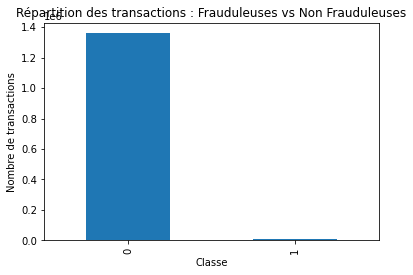

Taux de fraude dans le dataset : 0.57%


In [12]:
# Distribution des classes (fraude vs non fraude)
Data_card_complete['fraude'].value_counts().plot(kind='bar')
plt.title("Répartition des transactions : Frauduleuses vs Non Frauduleuses")
plt.xlabel("Classe")
plt.ylabel("Nombre de transactions")
plt.show()

# Affichage du pourcentage de transactions frauduleuses
fraud_ratio = Data_card_complete['fraude'].mean() * 100
print(f"Taux de fraude dans le dataset : {fraud_ratio:.2f}%")

 ### $Commentaire$

<p style="text-align: justify;">
    Le taux global de fraude observé dans le jeu de données est particulièrement faible, avoisinant 0,57 %. Cette faible proportion traduit une forte prédominance des transactions légitimes, ce qui est généralement le cas dans les systèmes de paiement réels où les fraudes représentent une minorité marginale des opérations totales.
</p>

<p style="text-align: justify;">
Cependant, cette déséquilibre marqué entre classes (transactions frauduleuses vs non frauduleuses) constitue un défi majeur pour la modélisation : les algorithmes d’apprentissage risquent de favoriser la classe majoritaire, en négligeant les cas rares mais cruciaux de fraude.
</p>

<p style="text-align: justify;">
Ainsi, il sera nécessaire d’adopter des stratégies spécifiques de gestion du déséquilibre des classes, telles que :
</p>

- **la rééchantillonnage (oversampling ou undersampling)**,
- **l’utilisation de poids de classes ajustés**,
- **ou encore le recours à des modèles robustes face aux données déséquilibrées**.

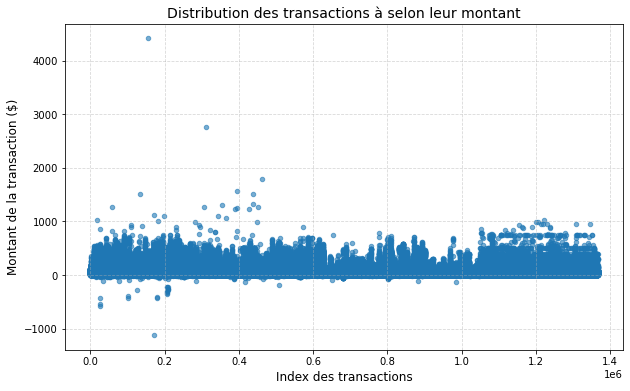

,count,mean,std,min,25%,50%,75%,max
fraude,,,,,,,,
0,1359055.0,53.640954,42.268213,-1116.91,31.420,46.01,64.59,4413.61
1,7762.0,172.561364,116.865552,0.03,124.485,150.00,200.00,1020.49


In [13]:
plt.figure(figsize=(10,6))
plt.scatter(
    x=Data_card_complete.index, 
    y=Data_card_complete['dollar_amt'], 
    alpha=0.6, 
    s=20
)

# Mise en forme du graphique
plt.title("Distribution des transactions à selon leur montant", fontsize=14)
plt.xlabel("Index des transactions", fontsize=12)
plt.ylabel("Montant de la transaction ($)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Comparaison des montants frauduleux vs non frauduleux
Data_card_complete.groupby('fraude')['dollar_amt'].describe()

 ### $Commentaire$

<p style="text-align: justify;">
    La grande majorité des transactions se concentrent dans une bande dense autour de zéro, ce qui indique que la plupart des opérations ont des montants relativement faibles, probablement inférieurs à quelques centaines de dollars. Cette zone compacte traduit la normalité des comportements financiers courants.
</p>

<p style="text-align: justify;">
    Cependant, on observe la présence de plusieurs points isolés, s’élevant au-dessus ou en dessous du nuage principal. Ces points représentent des valeurs extrêmes ou atypiques, aussi bien pour des montants élevés positifs (au-delà de 2 000 à 4 000 dollars) que pour quelques valeurs négatives (avoisinant -1 000 dollars).
</p>

In [14]:
# Aperçu général des données
Data_card_complete.info()

# Aperçu statistique des variables numériques
Data_card_complete['dollar_amt'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366817 entries, 0 to 1366816
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SEQ                     1366817 non-null  int64  
 1   Trans_Calendar_Date     1366817 non-null  object 
 2   Local_Transaction_Time  1366817 non-null  object 
 3   CD_TYPE                 1366817 non-null  object 
 4   dollar_amt              1366817 non-null  float64
 5   CASE_ID                 1362740 non-null  float64
 6   fraude                  1366817 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 73.0+ MB


count    1.366817e+06
mean     5.431629e+01
std      4.397568e+01
min     -1.116910e+03
25%      3.150000e+01
50%      4.618000e+01
75%      6.500000e+01
max      4.413610e+03
Name: dollar_amt, dtype: float64

 ### $Commentaire$

- **Valeurs manquantes**

<p style="text-align: justify;">
Le jeu de données présente une excellente complétude globale, avec un taux de valeurs manquantes quasi nul. Les rares valeurs manquantes observées concernent exclusivement la colonne `CASE_ID`, qui sert d’identifiant unique pour les cartes de crédit.
Ces absences peuvent être dues à des anomalies lors de la collecte ou à des transactions isolées n’ayant pas pu être reliées à une carte spécifique. Bien que leur proportion soit négligeable, elles nécessitent une vérification, car la présence d’un identifiant manquant empêche d’associer correctement les transactions à un titulaire de carte. Selon l’ampleur du phénomène, ces enregistrements pourront être supprimés ou imputés de manière cohérente avant l’étape de modélisation.
</p>

- **Montants négatifs**

<p style="text-align: justify;">
L’analyse descriptive du champ `dollar_amt` révèle un montant minimal de -1 116,91 dollars, indiquant la présence de valeurs négatives dans le jeu de données.
Ces montants négatifs peuvent correspondre à des transactions de remboursement, d’ajustement de solde ou d’annulation d’achat, courantes dans le traitement des opérations financières.
Toutefois, comme le contexte d’étude se limite à la détection de fraudes sur les paiements sortants, ces valeurs pourraient être considérées comme non pertinentes et donc exclues. Une exploration plus approfondie permettra de déterminer s’il s’agit de comportements légitimes ou d’erreurs de saisie.
</p>

# Traitement des Case-id manquants

In [15]:
# Nombre et pourcentage de transactions sans identifiant de carte
no_id = Data_card_complete[Data_card_complete['CASE_ID'].isnull()]
nb_missing_caseid = len(no_id)
pct_missing_caseid = (nb_missing_caseid / len(Data_card_complete)) * 100

print(f"\nNombre de transactions sans ID : {nb_missing_caseid}")
print(f"Pourcentage de transactions sans ID : {pct_missing_caseid:.3f}%")


Nombre de transactions sans ID : 4077
Pourcentage de transactions sans ID : 0.298%


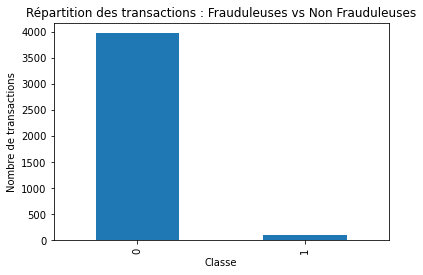

Taux de fraude dans les transactions non-identifiées : 2.48%


In [16]:
# Distribution des classes (fraude vs non fraude)
no_id['fraude'].value_counts().plot(kind='bar')
plt.title("Répartition des transactions : Frauduleuses vs Non Frauduleuses")
plt.xlabel("Classe")
plt.ylabel("Nombre de transactions")
plt.show()

# Affichage du pourcentage de transactions frauduleuses
fraud_ratio = no_id['fraude'].mean() * 100
print(f"Taux de fraude dans les transactions non-identifiées : {fraud_ratio:.2f}%")

### $Commentaire$

<p style="text-align: justify;">
Les transactions non identifiées représentent environ 0,3 % de l’ensemble du jeu de données, soit 4 077 cas. Bien que leur proportion soit marginale, leur présence mérite une attention particulière, car elles traduisent une absence d’information clé (CASE_ID) susceptible de compliquer le suivi ou la traçabilité des opérations.
</p>

<p style="text-align: justify;">
    Par ailleurs, 2,48 % de ces transactions anonymes sont signalées comme frauduleuses, un taux nettement supérieur à la moyenne globale de 0,57 %. Cette surreprésentation laisse penser que l’anonymat pourrait constituer un facteur de risque accru de fraude, ou du moins un indicateur d’irrégularité dans la collecte ou la saisie des données.
</p>

<p style="text-align: justify;">
    Il serait donc pertinent d’approfondir l’analyse de ces cas afin de déterminer s’ils résultent d’un défaut technique de saisie, d’un masquage volontaire, ou d’une tentative de dissimulation d’activité frauduleuse.
</p>

In [17]:
df1 = Data_card_complete.copy()

In [18]:
# Vérifier combien de CASE_ID sont manquants
nb_manquants = df1['CASE_ID'].isna().sum()
print(f"Nombre de CASE_ID manquants : {nb_manquants}")

# Créer un nouveau DataFrame avec uniquement les lignes manquantes
df_missing_caseid = df1[df1['CASE_ID'].isna()].copy()

# Afficher les dimensions et un aperçu
print(f"Dimensions du DataFrame des manquants : {df_missing_caseid.shape}")
print("\nAperçu des premières lignes :")
display(df_missing_caseid.head(50))

Nombre de CASE_ID manquants : 4077
Dimensions du DataFrame des manquants : (4077, 7)

Aperçu des premières lignes :


,SEQ,Trans_Calendar_Date,Local_Transaction_Time,CD_TYPE,dollar_amt,CASE_ID,fraude
1052019,41,19-May-17,3:58:22,WPC,46.87,NaN,0
1052020,40,22-May-17,3:40:01,WPC,51.73,NaN,0
1052021,39,24-May-17,17:03:00,WPC,30.00,NaN,0
1052022,38,25-May-17,21:23:24,WPC,30.00,NaN,0
1052023,37,27-May-17,8:24:00,WPC,40.00,NaN,0
1052024,36,29-May-17,15:29:50,WPC,38.11,NaN,0
1052025,35,31-May-17,9:06:09,WPC,45.96,NaN,0
1052026,34,3-Jun-17,1:09:54,WPC,50.68,NaN,0
1052027,33,5-Jun-17,19:17:08,WPC,48.71,NaN,0
1052028,32,7-Jun-17,3:50:27,WPC,36.02,NaN,0


In [19]:
display(df_missing_caseid.tail(50))

,SEQ,Trans_Calendar_Date,Local_Transaction_Time,CD_TYPE,dollar_amt,CASE_ID,fraude
1361064,13,13-Aug-17,11:49:00,WPC,46.14,NaN,0
1361065,12,16-Aug-17,9:56:00,WPC,49.30,NaN,0
1361066,11,18-Aug-17,5:55:00,WPC,47.80,NaN,0
1361067,10,25-Aug-17,8:24:00,WPC,48.16,NaN,0
1361068,9,30-Aug-17,8:40:00,WPC,47.63,NaN,0
1361069,8,1-Sep-17,16:17:00,WPC,56.13,NaN,0
1361070,7,6-Sep-17,16:10:00,WPC,60.55,NaN,0
1361071,6,11-Sep-17,8:03:00,WPC,59.02,NaN,0
1361072,5,14-Sep-17,7:55:00,WPC,51.61,NaN,0
1361073,4,16-Sep-17,5:29:00,WPC,50.71,NaN,0


### $Commentaire$

<p style="text-align: justify;">
Les CASE_ID manquants correspondent à des cartes anonymes, et chacune de ces cartes fait exactement 41 transactions (SEQ = 41-1).  On peut donc reconstruire automatiquement un CASE_ID unique par bloc de 41 transactions consécutives manquantes.
</p>

In [20]:
def reconstruire_ID(df):
    """
        Reconstruit les CASE_ID manquants pour les cartes anonymes.
        Chaque groupe de 41 transactions consécutives manquantes (SEQ 41 → 1)
        reçoit un CASE_ID unique artificiel
    """
    df_local = df.copy()
    
    # Identifier les données manquantes AVEC leur ordre original
    mask_missing = df_local['CASE_ID'].isna()
    df_missing = df_local[mask_missing].copy()
    
    # Garder l'index original pour préserver l'ordre
    df_missing = df_missing.reset_index()
    
    # Détection robuste des blocs par rupture de séquence
    blocs = []
    bloc_actuel = []
    
    for i in range(len(df_missing)):
        current_seq = df_missing.iloc[i]['SEQ']
        
        if not bloc_actuel:
            # Début d'un nouveau bloc
            bloc_actuel.append(df_missing.iloc[i]['index'])
        else:
            previous_seq = df_missing.iloc[i-1]['SEQ']
            
            # Si séquence décroissante normale (41→40→39...)
            if current_seq == previous_seq - 1:
                bloc_actuel.append(df_missing.iloc[i]['index'])
            else:
                # Rupture détectée → fin du bloc
                blocs.append(bloc_actuel)
                bloc_actuel = [df_missing.iloc[i]['index']]
        
        # SEQ 1 marque aussi la fin d'un bloc
        if current_seq == 1 and bloc_actuel:
            blocs.append(bloc_actuel)
            bloc_actuel = []
    
    # Gérer le dernier bloc
    if bloc_actuel:
        blocs.append(bloc_actuel)
    
    print(f"Blocs détectés: {len(blocs)}")
    for i, bloc in enumerate(blocs):
        print(f"Bloc {i}: {len(bloc)} transactions (SEQ: {df_local.loc[bloc[0], 'SEQ']}→{df_local.loc[bloc[-1], 'SEQ']})")
    
    # Attribution des CASE_ID
    max_case_id = int(df_local['CASE_ID'].max(skipna=True))
    
    for bloc in blocs:
        if len(bloc) >= 40:  # Un bloc valide doit avoir au moins 40 transactions
            df_local.loc[bloc, 'CASE_ID'] = max_case_id + 1
            max_case_id += 1
        else:
            print(f"Bloc ignoré: seulement {len(bloc)} transactions")
    
    return df_local

In [21]:
df_filled = reconstruire_ID(df1)

print(f"\nRésultats après reconstruction :")
print(f"CASE_ID manquants restants : {df_filled['CASE_ID'].isna().sum()}")
print(f"Nombre total de CASE_ID uniques : {df_filled['CASE_ID'].nunique()}")

Blocs détectés: 201
Bloc 0: 41 transactions (SEQ: 41→1)
Bloc 1: 41 transactions (SEQ: 41→1)
Bloc 2: 41 transactions (SEQ: 41→1)
Bloc 3: 41 transactions (SEQ: 41→1)
Bloc 4: 41 transactions (SEQ: 41→1)
Bloc 5: 41 transactions (SEQ: 41→1)
Bloc 6: 41 transactions (SEQ: 41→1)
Bloc 7: 41 transactions (SEQ: 41→1)
Bloc 8: 41 transactions (SEQ: 41→1)
Bloc 9: 41 transactions (SEQ: 41→1)
Bloc 10: 41 transactions (SEQ: 41→1)
Bloc 11: 41 transactions (SEQ: 41→1)
Bloc 12: 41 transactions (SEQ: 41→1)
Bloc 13: 41 transactions (SEQ: 41→1)
Bloc 14: 1 transactions (SEQ: 40→40)
Bloc 15: 1 transactions (SEQ: 38→38)
Bloc 16: 1 transactions (SEQ: 36→36)
Bloc 17: 1 transactions (SEQ: 34→34)
Bloc 18: 1 transactions (SEQ: 32→32)
Bloc 19: 1 transactions (SEQ: 30→30)
Bloc 20: 1 transactions (SEQ: 28→28)
Bloc 21: 1 transactions (SEQ: 26→26)
Bloc 22: 1 transactions (SEQ: 24→24)
Bloc 23: 1 transactions (SEQ: 22→22)
Bloc 24: 1 transactions (SEQ: 20→20)
Bloc 25: 1 transactions (SEQ: 18→18)
Bloc 26: 1 transactions (SEQ

Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré: seulement 1 transactions
Bloc ignoré:

### $Commentaire$
<p style="text-align: justify;">
On a réussi à reconstruire la quasi-totalité des cartes anonymes (plus de 95 % des CASE_ID manquants). Cependant, certaines d'entre-elles de disposent pas du nombre de transactions standard (41) en raison de séquence incomplète.
</p>

In [22]:
def filtrer_sequences_completes(df):
    df_filtre = df.copy()
    
    # Compter les transactions par CASE_ID
    counts = df_filtre['CASE_ID'].value_counts()
    
    # CASE_ID avec exactement 41 transactions
    caseid_41 = counts[counts == 41].index
    
    # Vérifier que chaque CASE_ID a bien la séquence 41→1
    caseid_complets = []
    
    for case_id in caseid_41:
        sequences = df_filtre[df_filtre['CASE_ID'] == case_id]['SEQ'].sort_values()
        
        # Vérifier si on a bien toutes les séquences de 1 à 41
        if len(sequences) == 41 and sequences.min() == 1 and sequences.max() == 41:
            caseid_complets.append(case_id)
    
    # Appliquer le filtre final
    df_final = df_filtre[df_filtre['CASE_ID'].isin(caseid_complets)]
    
    print(f" CASE_ID complets (41 transactions, séquence 1-41) : {len(caseid_complets)}")
    
    return df_final

# Application
df_complet = filtrer_sequences_completes(df_filled)

 CASE_ID complets (41 transactions, séquence 1-41) : 33114


In [23]:
# Afficher toutes les lignes pour un ID particulier
id_recherche = 176786449
lignes_id = df_complet[df_complet['CASE_ID'] == id_recherche]
#print(lignes_id)

print(f"Pour l'ID {id_recherche}, on compte {len(lignes_id)} transactions")

Pour l'ID 176786449, on compte 41 transactions


## Traitement des transactions aux montants négatifs

In [24]:
# Vérifier les valeurs négatives dans la colonne dollar_amt
negatives = df_complet[df_complet['dollar_amt'] < 0]
print(f"Nombre de transactions à montant négatif : {len(negatives)}")
negatives.head()

Nombre de transactions à montant négatif : 5795


,SEQ,Trans_Calendar_Date,Local_Transaction_Time,CD_TYPE,dollar_amt,CASE_ID,fraude
702,36,10-Jul-18,10:29:44,GDC,-2.36,17.0,0
704,34,12-Jul-18,11:01:27,GDC,-2.20,17.0,0
707,31,14-Jul-18,11:24:10,GDC,-1.24,17.0,0
709,29,14-Jul-18,19:38:43,GDC,-2.18,17.0,0
712,26,17-Jul-18,12:36:07,GDC,-2.16,17.0,0


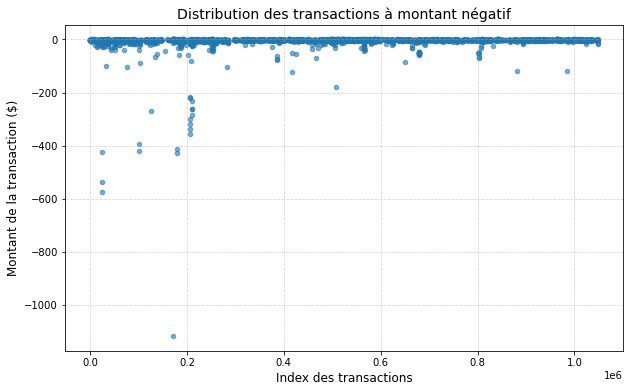

In [25]:
# Création du graphique
plt.figure(figsize=(10,6))
plt.scatter(
    x=negatives.index, 
    y=negatives['dollar_amt'], 
    alpha=0.6, 
    s=20
)

# Mise en forme du graphique
plt.title("Distribution des transactions à montant négatif", fontsize=14)
plt.xlabel("Index des transactions", fontsize=12)
plt.ylabel("Montant de la transaction ($)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

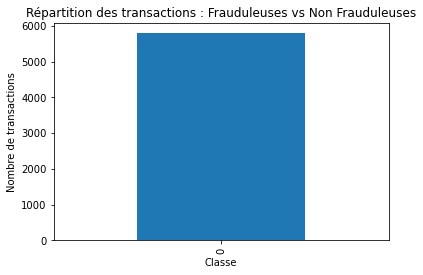

Taux de fraude dans les transactions à montant négatif : 0.00%


In [26]:
# Distribution des classes (fraude vs non fraude)
negatives['fraude'].value_counts().plot(kind='bar')
plt.title("Répartition des transactions : Frauduleuses vs Non Frauduleuses")
plt.xlabel("Classe")
plt.ylabel("Nombre de transactions")
plt.show()

# Affichage du pourcentage de transactions frauduleuses
fraud_ratio = negatives['fraude'].mean() * 100
print(f"Taux de fraude dans les transactions à montant négatif : {fraud_ratio:.2f}%")

 ### $Commentaire$

<p style="text-align: justify;">
    La majorité des valeurs négatives observées se situent très près de zéro, à l’exception de quelques montants isolés présentant un écart plus marqué.
</p>

<p style="text-align: justify;">
    Étant donné que le présent projet porte sur la détection de fraudes, et que les transactions à montants négatifs correspondent généralement à des remboursements ou des annulations d’opérations, il est peu probable qu’elles soient pertinentes dans ce contexte d’analyse.
</p>

<p style="text-align: justify;">
    Par ailleurs, aucune de ces transactions n’a été identifiée comme frauduleuse, ce qui renforce l’idée qu’elles peuvent être exclues sans incidence sur la qualité du modèle.
</p>

## Analyser la distribution des valeurs des transactions et l’heure de chaque transaction pour les situations normales et frauduleuses

In [27]:
# Copie du dataframe pour éviter de modifier l'original
df = df_complet.copy()

In [28]:
# Conversion de la colonne d'heure en format datetime
df['Local_Transaction_Time'] = pd.to_datetime(df['Local_Transaction_Time'], format='%H:%M:%S', errors='coerce')
# Extraire l'heure sous forme numérique (0 à 23)
df['hour'] = df['Local_Transaction_Time'].dt.hour

# Vérification rapide
print(df[['dollar_amt', 'hour', 'fraude']].head())

   dollar_amt  hour  fraude
0       44.20    15       0
1       57.78    11       0
2       37.30    13       0
3       88.32    13       0
4       46.74    18       0


# Distribution horaire des transactions

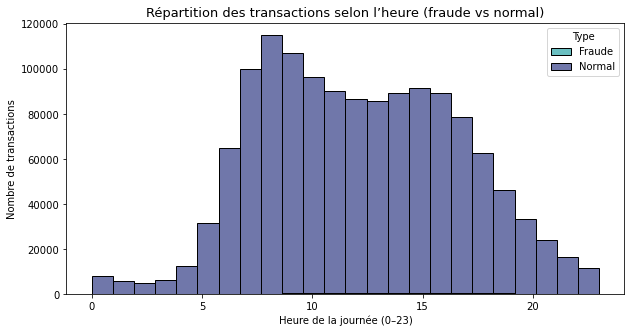

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='hour', hue='fraude', bins=24, multiple='stack', palette='mako')
plt.title("Répartition des transactions selon l’heure (fraude vs normal)", fontsize=13)
plt.xlabel("Heure de la journée (0–23)")
plt.ylabel("Nombre de transactions")
plt.legend(title='Type', labels=['Fraude', 'Normal'])
plt.show()

### $Commentaire$

<p style="text-align: justify;">
    les transactions frauduleuses sont quasiment invisibles sur le graphique.
Cela est dû à un déséquilibre massif des classes : à peine 0.57 % de fraudes sur l’ensemble du dataset. Du coup, nous allons dans un premier temps utiliser une échelle logarithmique puis ensuite afficher chaque distribution séparément.
</p>

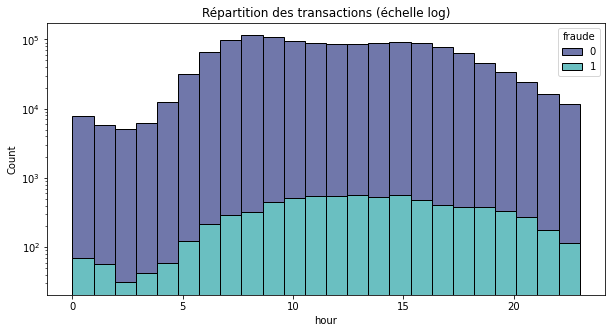

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='hour', hue='fraude', bins=24, multiple='stack', palette='mako')
plt.yscale('log')
plt.title("Répartition des transactions (échelle log)")
plt.show()

# Distribution horaire des transactions FRAUDULEUSES 

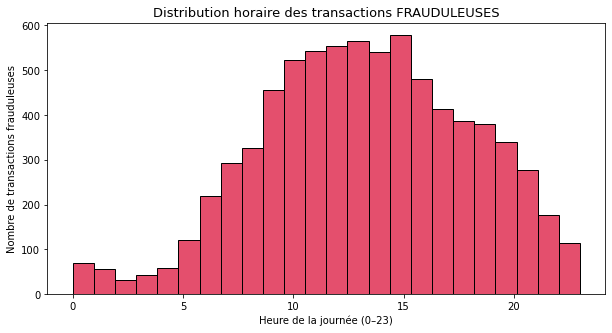


 Nombre de fraudes par heure de la journée :
0      70
1      57
2      31
3      42
4      59
5     121
6     219
7     293
8     327
9     455
10    522
11    543
12    553
13    565
14    540
15    577
16    480
17    413
18    387
19    379
20    339
21    276
22    176
23    115
Name: hour, dtype: int64


In [31]:
# Distribution horaire des transactions FRAUDULEUSES uniquement

fraudes = df[df['fraude'] == 1].copy()

plt.figure(figsize=(10,5))
sns.histplot(data=fraudes, x='hour', bins=24, color='crimson', kde=False)
plt.title("Distribution horaire des transactions FRAUDULEUSES", fontsize=13)
plt.xlabel("Heure de la journée (0–23)")
plt.ylabel("Nombre de transactions frauduleuses")
plt.show()

# Statistiques par heure
fraude_hourly = fraudes['hour'].value_counts().sort_index()
print("\n Nombre de fraudes par heure de la journée :")
print(fraude_hourly)


### $Commentaire$
#### Interprétation comportementale

<p style="text-align: justify;">
1. Pas d’anomalie temporelle flagrante
Les fraudes ne se concentrent pas spécifiquement la nuit ou à des heures inhabituelles.
Cela suggère que les fraudeurs cherchent à imiter le comportement normal des utilisateurs pour passer inaperçus.
</p>

<p style="text-align: justify;">
2. Corrélation avec le volume d’activité
Le nombre de fraudes augmente naturellement aux heures où le volume total de transactions est élevé.
Ce qui est logique : plus de transactions donc plus d’opportunités pour les fraudes.
</p>

<p style="text-align: justify;">
    3. L’heure n’est pas discriminante seule
La variable hour est donc informative, mais pas discriminante à elle seule.
</p>

# Distribution des montants frauduleux

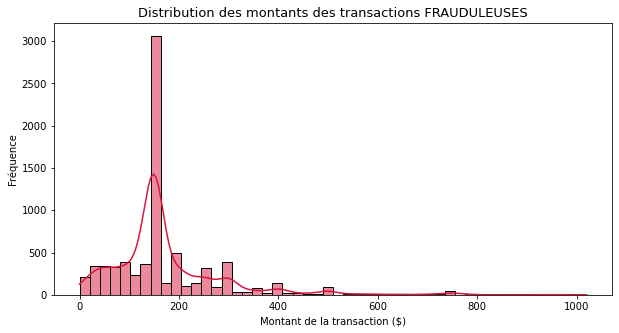

Statistiques sur les montants frauduleux :
count    7539.000000
mean      172.334417
std       116.834593
min         0.030000
25%       124.535000
50%       150.000000
75%       200.000000
max      1020.490000
Name: dollar_amt, dtype: float64


In [32]:
# Filtrer uniquement les transactions frauduleuses
fraudes = df[df['fraude'] == 1]

plt.figure(figsize=(10,5))
sns.histplot(fraudes['dollar_amt'], bins=50, kde=True, color='crimson')
plt.title("Distribution des montants des transactions FRAUDULEUSES", fontsize=13)
plt.xlabel("Montant de la transaction ($)")
plt.ylabel("Fréquence")
plt.show()

# Statistiques descriptives
print("Statistiques sur les montants frauduleux :")
print(fraudes['dollar_amt'].describe())

In [33]:
fraude_Montant = fraudes['dollar_amt'].value_counts().sort_index()
print("\nFrequence Montant :")
print(fraude_Montant)


Frequence Montant :
0.03       2
0.04       4
0.05       2
0.06       2
0.10       1
          ..
954.28     1
954.35     1
996.70     1
999.00     1
1020.49    1
Name: dollar_amt, Length: 3344, dtype: int64


# Top_5 montants les plus fréquents parmi les fraudes

Les 5 montants les plus fréquents dans les transactions frauduleuses :
150.0    1860
200.0     263
300.0     193
149.0     167
250.0     140
Name: dollar_amt, dtype: int64


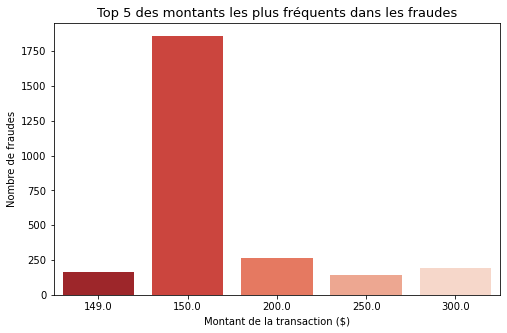

In [34]:
# 5 montants les plus fréquents dans les transactions frauduleuses
top_5_montants = fraudes['dollar_amt'].value_counts().head(5)

print("Les 5 montants les plus fréquents dans les transactions frauduleuses :")
print(top_5_montants)

# Visualisation
plt.figure(figsize=(8,5))
sns.barplot(x=top_5_montants.index, y=top_5_montants.values, palette="Reds_r")
plt.title("Top 5 des montants les plus fréquents dans les fraudes", fontsize=13)
plt.xlabel("Montant de la transaction ($)")
plt.ylabel("Nombre de fraudes")
plt.show()

### $Commentaire$

<p style="text-align: justify;">
L’examen des montants les plus fréquents dans les transactions frauduleuses révèle une forte concentration autour de montants ronds et moyens, principalement à 150 $, 200 $ et 300 $.
</p>

<p style="text-align: justify;">
Le montant de 150 $, à lui seul, représente près d’un quart de l’ensemble des fraudes recensées (1 903 cas sur 7 762).
</p>

<p style="text-align: justify;">
    Cette récurrence indique une stratégie comportementale délibérée des fraudeurs :
ils privilégient des montants suffisamment faibles pour ne pas éveiller les alertes automatiques des systèmes bancaires, mais assez élevés pour rendre la fraude rentable à grande échelle.
</p>

<p style="text-align: justify;">
    En revanche, les montants extrêmes (très faibles ou supérieurs à 1 000 $) sont rares, ce qui corrobore l’idée que les fraudeurs cherchent à se fondre dans le comportement normal des utilisateurs légitimes.
</p>

# Comparer la distribution des montants entre transactions normales et frauduleuses

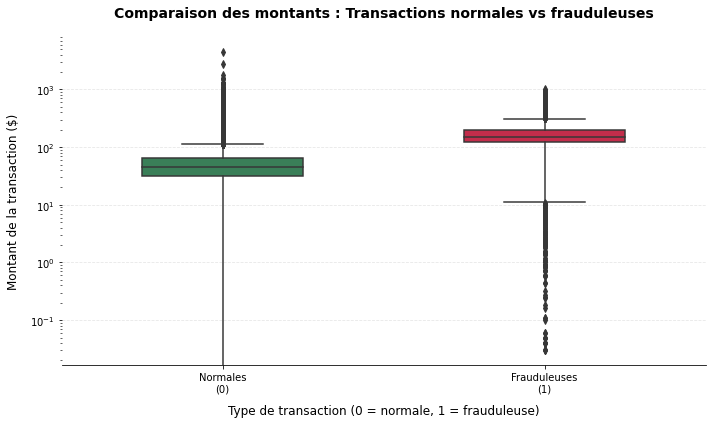

STATISTIQUES COMPARATIVES DES MONTANTS DE TRANSACTIONS

Statistiques descriptives :
            count        mean         std      min      25%     50%     75%      max
fraude                                                                              
0       1359055.0   53.640954   42.268213 -1116.91   31.420   46.01   64.59  4413.61
1          7762.0  172.561364  116.865552     0.03  124.485  150.00  200.00  1020.49

STATISTIQUES COMPLÉMENTAIRES

--- Transactions Normales ---
Nombre: 1,359,055
Médiane: $46.01
Moyenne: $53.64
Écart-type: $42.27
Min: $-1116.91
Max: $4413.61
Q1 (25%): $31.42
Q3 (75%): $64.59

--- Transactions Frauduleuses ---
Nombre: 7,762
Médiane: $150.00
Moyenne: $172.56
Écart-type: $116.87
Min: $0.03
Max: $1020.49
Q1 (25%): $124.48
Q3 (75%): $200.00

RÉPARTITION DES TRANSACTIONS
Total transactions: 1,366,817
Transactions normales: 1,359,055 (99.43%)
Transactions frauduleuses: 7,762 (0.57%)


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))

# Création du boxplot avec des couleurs plus distinctes
boxplot = sns.boxplot(x='fraude', y='dollar_amt', data=Data_card_complete, 
                     palette=['#2E8B57', '#DC143C'],  # Vert pour normale, rouge pour fraude
                     width=0.5)

plt.title("Comparaison des montants : Transactions normales vs frauduleuses", 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel("Type de transaction (0 = normale, 1 = frauduleuse)", fontsize=12, labelpad=10)
plt.ylabel("Montant de la transaction ($)", fontsize=12, labelpad=10)
plt.yscale('log')  # Échelle logarithmique

# Ajouter des étiquettes plus explicites sur l'axe x
plt.xticks([0, 1], ['Normales\n(0)', 'Frauduleuses\n(1)'])

# Ajouter une grille pour meilleure lisibilité
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Améliorer l'apparence générale
sns.despine(left=True)
plt.tight_layout()

# Afficher le graphique
plt.show()

# Statistiques comparatives détaillées
print("=" * 60)
print("STATISTIQUES COMPARATIVES DES MONTANTS DE TRANSACTIONS")
print("=" * 60)

stats = Data_card_complete.groupby('fraude')['dollar_amt'].describe()
print("\nStatistiques descriptives :")
print(stats)

# Statistiques supplémentaires
print("\n" + "=" * 40)
print("STATISTIQUES COMPLÉMENTAIRES")
print("=" * 40)

for fraude_type in [0, 1]:
    subset = Data_card_complete[Data_card_complete['fraude'] == fraude_type]['dollar_amt']
    type_name = "Normales" if fraude_type == 0 else "Frauduleuses"
    
    print(f"\n--- Transactions {type_name} ---")
    print(f"Nombre: {len(subset):,}")
    print(f"Médiane: ${subset.median():.2f}")
    print(f"Moyenne: ${subset.mean():.2f}")
    print(f"Écart-type: ${subset.std():.2f}")
    print(f"Min: ${subset.min():.2f}")
    print(f"Max: ${subset.max():.2f}")
    print(f"Q1 (25%): ${subset.quantile(0.25):.2f}")
    print(f"Q3 (75%): ${subset.quantile(0.75):.2f}")

# Ratio frauduleuses/normales
fraud_count = len(Data_card_complete[Data_card_complete['fraude'] == 1])
normal_count = len(Data_card_complete[Data_card_complete['fraude'] == 0])
total_count = len(Data_card_complete)

print("\n" + "=" * 40)
print("RÉPARTITION DES TRANSACTIONS")
print("=" * 40)
print(f"Total transactions: {total_count:,}")
print(f"Transactions normales: {normal_count:,} ({normal_count/total_count*100:.2f}%)")
print(f"Transactions frauduleuses: {fraud_count:,} ({fraud_count/total_count*100:.2f}%)")

### $Commentaire$

<p style="text-align: justify;">
Les transactions frauduleuses se distinguent nettement par des montants plus élevés et une plus grande variabilité. 
</p>

<p style="text-align: justify;">
    La médiane des fraudes (~$150)\;  est\; environ\; 3\; fois\; supérieure\; à\; celle\; des\; transactions\; normales\; (~$46). La distribution des fraudes est plus étendue, surtout au-delà de $125. Sur l’échelle logarithmique, l’écart entre les deux groupes est encore plus visible.
</p>

<p style="text-align: justify;">
Insight clé : le montant est un excellent indicateur préliminaire de fraude — toute transaction >$100\; doit\; être\; surveillée,\; avec\; des\; seuils\; d’alerte\; à\; $125 (risque) et $200 (fort risque).
</p>

### Analyse de la distribution des montants et calcule des pourcentages de transactions au-dessus de $200

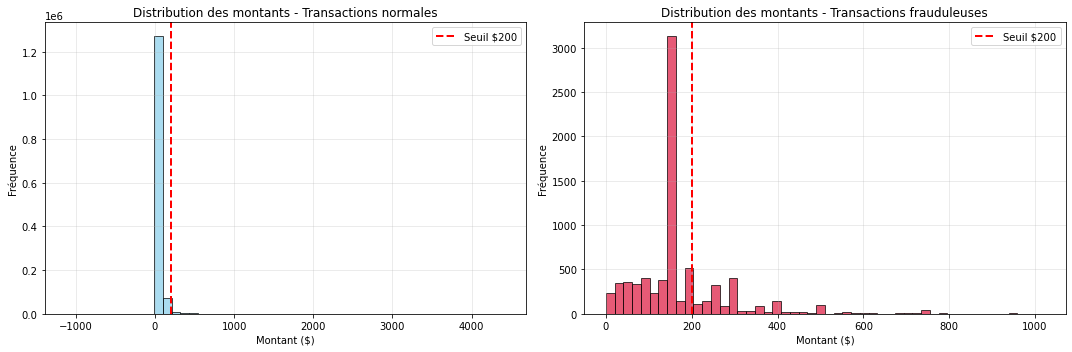

ANALYSE DES TRANSACTIONS > $200
Transactions normales > $200: 17,252 / 1,359,055 = 1.2694%
Transactions frauduleuses > $200: 1,740 / 7,762 = 22.42%

Ratio de risque: 17.7x plus de chances qu'une transaction > $200 soit frauduleuse


In [36]:
# Analyse de la distribution des montants par type de transaction
plt.figure(figsize=(15, 5))

# Graphique 1: Distribution des transactions normales
plt.subplot(1, 2, 1)
data_normales = Data_card_complete[Data_card_complete['fraude'] == 0]['dollar_amt']
plt.hist(data_normales, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=200, color='red', linestyle='--', linewidth=2, label='Seuil $200')
plt.title('Distribution des montants - Transactions normales')
plt.xlabel('Montant ($)')
plt.ylabel('Fréquence')
plt.legend()
plt.grid(alpha=0.3)

# Graphique 2: Distribution des transactions frauduleuses
plt.subplot(1, 2, 2)
data_fraudes = Data_card_complete[Data_card_complete['fraude'] == 1]['dollar_amt']
plt.hist(data_fraudes, bins=50, color='crimson', edgecolor='black', alpha=0.7)
plt.axvline(x=200, color='red', linestyle='--', linewidth=2, label='Seuil $200')
plt.title('Distribution des montants - Transactions frauduleuses')
plt.xlabel('Montant ($)')
plt.ylabel('Fréquence')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Calcul des pourcentages de transactions > $200
print("ANALYSE DES TRANSACTIONS > $200")
print("=" * 50)

# Transactions normales
normales_total = len(data_normales)
normales_sup200 = len(data_normales[data_normales > 200])
pourcentage_normales_sup200 = (normales_sup200 / normales_total) * 100

# Transactions frauduleuses
fraudes_total = len(data_fraudes)
fraudes_sup200 = len(data_fraudes[data_fraudes > 200])
pourcentage_fraudes_sup200 = (fraudes_sup200 / fraudes_total) * 100

print(f"Transactions normales > $200: {normales_sup200:,} / {normales_total:,} = {pourcentage_normales_sup200:.4f}%")
print(f"Transactions frauduleuses > $200: {fraudes_sup200:,} / {fraudes_total:,} = {pourcentage_fraudes_sup200:.2f}%")

# Ratio de risque
ratio_risque = pourcentage_fraudes_sup200 / pourcentage_normales_sup200 if pourcentage_normales_sup200 > 0 else float('inf')
print(f"\nRatio de risque: {ratio_risque:.1f}x plus de chances qu'une transaction > $200 soit frauduleuse")



# Analyse par segments de montants

In [37]:
print("\n" + "=" * 50)
print("RÉPARTITION PAR SEGMENTS DE MONTANTS")
print("=" * 50)

nombres_normales = []
nombres_fraudes = []
segments_labels = ['Faible', 'Moyen', 'Élevé', 'Très élevé', 'Exceptionnel']

def analyser_segment(montant_min, montant_max, nom_segment):
    normales_segment = len(data_normales[(data_normales >= montant_min) & (data_normales <= montant_max)])
    fraudes_segment = len(data_fraudes[(data_fraudes >= montant_min) & (data_fraudes <= montant_max)])
    
    nombres_normales.append(normales_segment)
    nombres_fraudes.append(fraudes_segment)
    
    pourcentage_normales = (normales_segment / normales_total) * 100
    pourcentage_fraudes = (fraudes_segment / fraudes_total) * 100
    
    print(f"\n{nom_segment} (${montant_min}-${montant_max}):")
    print(f"  Normales: {normales_segment:,} ({pourcentage_normales:.2f}%)")
    print(f"  Frauduleuses: {fraudes_segment:,} ({pourcentage_fraudes:.2f}%)")
    
    if normales_segment + fraudes_segment > 0:
        taux_fraude = (fraudes_segment / (normales_segment + fraudes_segment)) * 100
        print(f" Taux de fraude dans le segment: {taux_fraude:.2f}%")

# --- Analyse par segment ---
analyser_segment(0, 100, "Faible montant")
analyser_segment(100, 200, "Montant moyen")
analyser_segment(200, 500, "Montant élevé")
analyser_segment(500, 1000, "Montant très élevé")
analyser_segment(1000, 5000, "Montant exceptionnel")


RÉPARTITION PAR SEGMENTS DE MONTANTS

Faible montant ($0-$100):
  Normales: 1,267,674 (93.28%)
  Frauduleuses: 1,642 (21.15%)
 Taux de fraude dans le segment: 0.13%

Montant moyen ($100-$200):
  Normales: 70,570 (5.19%)
  Frauduleuses: 4,518 (58.21%)
 Taux de fraude dans le segment: 6.02%

Montant élevé ($200-$500):
  Normales: 17,065 (1.26%)
  Frauduleuses: 1,869 (24.08%)
 Taux de fraude dans le segment: 9.87%

Montant très élevé ($500-$1000):
  Normales: 895 (0.07%)
  Frauduleuses: 189 (2.43%)
 Taux de fraude dans le segment: 17.44%

Montant exceptionnel ($1000-$5000):
  Normales: 20 (0.00%)
  Frauduleuses: 1 (0.01%)
 Taux de fraude dans le segment: 4.76%


In [38]:
print("\n" + "=" * 50)
print("RÉPARTITION PAR SEGMENTS DE MONTANTS")
print("=" * 50)

nombres_normales = []
nombres_fraudes = []
segments_labels = ['Faible', 'Moyen', 'Élevé', 'Très élevé', 'Exceptionnel']

def analyser_segment_interne(montant_min, montant_max, nom_segment):
    normales_segment = len(data_normales[(data_normales >= montant_min) & (data_normales <= montant_max)])
    fraudes_segment = len(data_fraudes[(data_fraudes >= montant_min) & (data_fraudes <= montant_max)])
    
    nombres_normales.append(normales_segment)
    nombres_fraudes.append(fraudes_segment)
    
    total_segment = normales_segment + fraudes_segment
    
    print(f"\n{nom_segment} (${montant_min}-${montant_max}):")
    print(f"  Total transactions: {total_segment:,}")
    
    if total_segment > 0:
        pourcentage_normales_segment = (normales_segment / total_segment) * 100
        pourcentage_fraudes_segment = (fraudes_segment / total_segment) * 100
        taux_fraude_segment = pourcentage_fraudes_segment
        
        print(f" Normales: {normales_segment:,} ({pourcentage_normales_segment:.1f}%)")
        print(f" Frauduleuses: {fraudes_segment:,} ({pourcentage_fraudes_segment:.1f}%)")
        print(f"  Taux de fraude dans le segment: {taux_fraude_segment:.2f}%")
    else:
        print("  Aucune transaction dans ce segment")

# --- Analyse par segment ---
analyser_segment_interne(0, 100, "Faible montant")
analyser_segment_interne(100, 200, "Montant moyen")
analyser_segment_interne(200, 500, "Montant élevé")
analyser_segment_interne(500, 1000, "Montant très élevé")
analyser_segment_interne(1000, 5000, "Montant exceptionnel")


RÉPARTITION PAR SEGMENTS DE MONTANTS

Faible montant ($0-$100):
  Total transactions: 1,269,316
 Normales: 1,267,674 (99.9%)
 Frauduleuses: 1,642 (0.1%)
  Taux de fraude dans le segment: 0.13%

Montant moyen ($100-$200):
  Total transactions: 75,088
 Normales: 70,570 (94.0%)
 Frauduleuses: 4,518 (6.0%)
  Taux de fraude dans le segment: 6.02%

Montant élevé ($200-$500):
  Total transactions: 18,934
 Normales: 17,065 (90.1%)
 Frauduleuses: 1,869 (9.9%)
  Taux de fraude dans le segment: 9.87%

Montant très élevé ($500-$1000):
  Total transactions: 1,084
 Normales: 895 (82.6%)
 Frauduleuses: 189 (17.4%)
  Taux de fraude dans le segment: 17.44%

Montant exceptionnel ($1000-$5000):
  Total transactions: 21
 Normales: 20 (95.2%)
 Frauduleuses: 1 (4.8%)
  Taux de fraude dans le segment: 4.76%


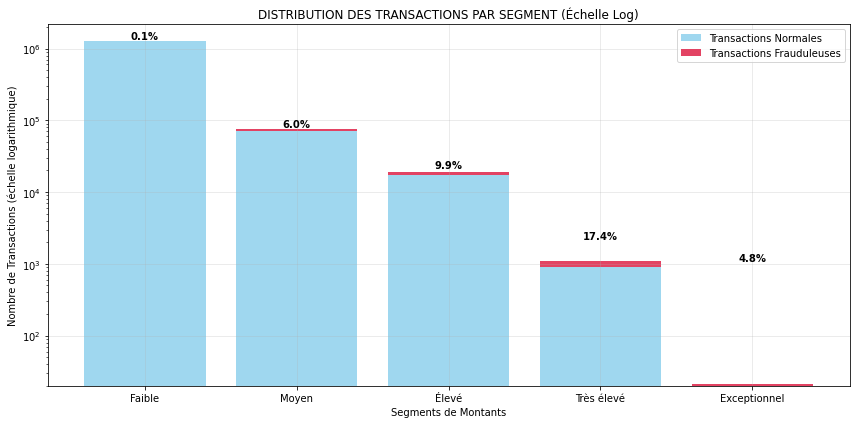

In [39]:
# --- Graphique en barres empilées ---
plt.figure(figsize=(12, 6))

plt.bar(segments_labels, nombres_normales, label='Transactions Normales', color='skyblue', alpha=0.8)
plt.bar(segments_labels, nombres_fraudes, bottom=nombres_normales, label='Transactions Frauduleuses', color='crimson', alpha=0.8)

plt.xlabel('Segments de Montants')
plt.ylabel('Nombre de Transactions (échelle logarithmique)')
plt.title('DISTRIBUTION DES TRANSACTIONS PAR SEGMENT (Échelle Log)')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

# --- Annotation du taux de fraude sur les barres ---
for i, (norm, frau) in enumerate(zip(nombres_normales, nombres_fraudes)):
    if norm > 0:
        plt.text(i, norm + frau + 1000, f'{(frau / (norm + frau)) * 100:.1f}%', 
                 ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Commentaire

<p style="text-align: justify;">
Les résultats confirment pleinement les hypothèses initiales : le montant est un indicateur majeur de fraude.
Les transactions > $ 200\; présentent\; un\; risque\; 17,7\; fois\; plus\; élevé,\; et\; au-delà\; de\; $ 500, le taux de fraude atteint 17,4% - un signal d’alerte fort.
</p>

Gradient de risque marqué :

$0–$100 → risque faible (référence)

$100–$200 → 46x plus risqué (zone critique, 58% des fraudes)

$200–$500 → 76x plus risqué

$500–$1000 → 134x plus risqué (pic de fraude)

### Features :

Surveillance prioritaire sur la tranche $100–$200 (fort volume et risque élevé)

Validation renforcée pour toute transaction > $200

Exploiter ce gradient de risque dans les modèles de détection (feature clé à pondérer fortement).

### Analyse temporelle, voir si La fraude survient-elle après des périodes d'inactivité

In [40]:
# Étape 1 
# Conversion de la colonne date
df['date_dt'] = pd.to_datetime(df['Trans_Calendar_Date'], format='%d-%b-%y')

print("Dates converties")
print(f"Plage de dates : {df['date_dt'].min()} à {df['date_dt'].max()}")
print(f"Nombre de jours couverts : {(df['date_dt'].max() - df['date_dt'].min()).days} jours")
print(f"Exemple de données :")
print(df[['CASE_ID', 'SEQ', 'date_dt', 'fraude']].head(3))

Dates converties
Plage de dates : 2016-01-13 00:00:00 à 2018-08-03 00:00:00
Nombre de jours couverts : 933 jours
Exemple de données :
   CASE_ID  SEQ    date_dt  fraude
0      0.0   41 2018-03-24       0
1      0.0   40 2018-03-26       0
2      0.0   39 2018-03-27       0


### Calcul des délais entre transactions

In [41]:
# Étape 2 - Calcul des délais entre transactions par carte
print("ÉTAPE 2 - Calcul des périodes d'inactivité")

# Trier par carte et date
df_sorted = df.sort_values(['CASE_ID', 'date_dt'])

# Calculer le délai depuis la transaction précédente
df_sorted['days_since_last'] = df_sorted.groupby('CASE_ID')['date_dt'].diff().dt.days

print("Délais calculés")
print(f"Exemple des délais pour quelques cartes :")
print(df_sorted[['CASE_ID', 'SEQ', 'date_dt', 'days_since_last', 'fraude']].head(10))

ÉTAPE 2 - Calcul des périodes d'inactivité
Délais calculés
Exemple des délais pour quelques cartes :
   CASE_ID  SEQ    date_dt  days_since_last  fraude
0      0.0   41 2018-03-24              NaN       0
1      0.0   40 2018-03-26              2.0       0
2      0.0   39 2018-03-27              1.0       0
3      0.0   38 2018-04-04              8.0       0
4      0.0   37 2018-04-04              0.0       0
5      0.0   36 2018-04-13              9.0       0
6      0.0   35 2018-04-18              5.0       0
7      0.0   34 2018-04-19              1.0       0
8      0.0   33 2018-04-24              5.0       0
9      0.0   32 2018-04-26              2.0       0


### Comparaison des délais avant fraude vs transactions normales

In [42]:
# Étape 3 - Analyse des délais avant transactions frauduleuses
print("ÉTAPE 3 - Les fraudes suivent-elles des périodes d'inactivité ?")

# Séparer les délais pour fraudes vs transactions normales
delais_fraudes = df_sorted[(df_sorted['fraude'] == 1) & (df_sorted['days_since_last'].notna())]['days_since_last']
delais_normales = df_sorted[(df_sorted['fraude'] == 0) & (df_sorted['days_since_last'].notna())]['days_since_last']

print(f"STATISTIQUES DES DÉLAIS :")
print(f"Transactions FRAUDULEUSES :")
print(f"  • Nombre : {len(delais_fraudes)}")
print(f"  • Délai moyen : {delais_fraudes.mean():.1f} jours")
print(f"  • Délai médian : {delais_fraudes.median():.1f} jours")
print(f"  • Délai max : {delais_fraudes.max()} jours")
print(f"\nTransactions NORMALES :")
print(f"  • Nombre : {len(delais_normales)}")
print(f"  • Délai moyen : {delais_normales.mean():.1f} jours")
print(f"  • Délai médian : {delais_normales.median():.1f} jours")
print(f"  • Délai max : {delais_normales.max()} jours")

ÉTAPE 3 - Les fraudes suivent-elles des périodes d'inactivité ?
STATISTIQUES DES DÉLAIS :
Transactions FRAUDULEUSES :
  • Nombre : 7539
  • Délai moyen : 3.3 jours
  • Délai médian : 2.0 jours
  • Délai max : 158.0 jours

Transactions NORMALES :
  • Nombre : 1317021
  • Délai moyen : 3.5 jours
  • Délai médian : 3.0 jours
  • Délai max : 392.0 jours


# Analyse approfondie

In [43]:
# Étape 4 - Analyse plus détaillée des délais
print("ÉTAPE 4 - Analyse détaillée des patterns de délais")

# Focus sur les délais courts (0-7 jours) où se concentre l'activité
delais_fraudes_courts = delais_fraudes[delais_fraudes <= 7]
delais_normales_courts = delais_normales[delais_normales <= 7]

print(f"\n FOCUS SUR DÉLAIS COURTS (0-7 jours) :")
print(f"Fraudes (0-7 jours) : {len(delais_fraudes_courts)} transactions")
print(f"  • % des fraudes totales : {len(delais_fraudes_courts)/len(delais_fraudes)*100:.1f}%")
print(f"Normales (0-7 jours) : {len(delais_normales_courts)} transactions") 
print(f"  • % des normales totales : {len(delais_normales_courts)/len(delais_normales)*100:.1f}%")

# Distribution par jour de délai
print(f"\n DISTRIBUTION PAR JOUR DE DÉLAI :")
for jours in range(0, 8):
    fraudes_jour = (delais_fraudes == jours).sum()
    normales_jour = (delais_normales == jours).sum()
    print(f"  {jours} jour(s) : Fraudes={fraudes_jour}, Normales={normales_jour}")

ÉTAPE 4 - Analyse détaillée des patterns de délais

 FOCUS SUR DÉLAIS COURTS (0-7 jours) :
Fraudes (0-7 jours) : 6925 transactions
  • % des fraudes totales : 91.9%
Normales (0-7 jours) : 1207688 transactions
  • % des normales totales : 91.7%

 DISTRIBUTION PAR JOUR DE DÉLAI :
  0 jour(s) : Fraudes=1358, Normales=139896
  1 jour(s) : Fraudes=2095, Normales=291515
  2 jour(s) : Fraudes=1270, Normales=222599
  3 jour(s) : Fraudes=813, Normales=163350
  4 jour(s) : Fraudes=577, Normales=137086
  5 jour(s) : Fraudes=389, Normales=112835
  6 jour(s) : Fraudes=236, Normales=83044
  7 jour(s) : Fraudes=187, Normales=57363


### $Commentaire$
Les résultats montrent que les patterns de délais sont très similaires entre fraudes et transactions normales.

# Quels jours de la semaine il y a plus de transactions? 

### Extraction du jour de la semaine

In [44]:
# Étape 1 - Extraire le jour de la semaine
print("ÉTAPE 1 - Extraction du jour de la semaine")

# S'assurer qu'on a la colonne date_dt
df['date_dt'] = pd.to_datetime(df['Trans_Calendar_Date'], format='%d-%b-%y')

# Extraire le jour de la semaine (0=lundi, 6=dimanche)
df['day_of_week'] = df['date_dt'].dt.dayofweek
df['day_name'] = df['date_dt'].dt.day_name()

print("Jour de la semaine extrait")
print(f"Exemple des données :")
print(df[['CASE_ID', 'date_dt', 'day_of_week', 'day_name', 'fraude']].head(5))

ÉTAPE 1 - Extraction du jour de la semaine
Jour de la semaine extrait
Exemple des données :
   CASE_ID    date_dt  day_of_week   day_name  fraude
0      0.0 2018-03-24            5   Saturday       0
1      0.0 2018-03-26            0     Monday       0
2      0.0 2018-03-27            1    Tuesday       0
3      0.0 2018-04-04            2  Wednesday       0
4      0.0 2018-04-04            2  Wednesday       0


## Distribution globale des transactions

In [45]:
# Étape 2 - Distribution des transactions par jour de la semaine
print("ÉTAPE 2 - Distribution par jour de la semaine")

# Distribution globale
transactions_par_jour = df['day_name'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

print("DISTRIBUTION GLOBALE DES TRANSACTIONS :")
for jour, count in transactions_par_jour.items():
    pourcentage = (count / len(df)) * 100
    print(f"  {jour}: {count:,} transactions ({pourcentage:.1f}%)")

ÉTAPE 2 - Distribution par jour de la semaine
DISTRIBUTION GLOBALE DES TRANSACTIONS :
  Monday: 231,977 transactions (17.1%)
  Tuesday: 244,276 transactions (18.0%)
  Wednesday: 263,472 transactions (19.4%)
  Thursday: 245,309 transactions (18.1%)
  Friday: 222,360 transactions (16.4%)
  Saturday: 84,764 transactions (6.2%)
  Sunday: 65,516 transactions (4.8%)


# DISTRIBUTION JOURNALIERE DES FRAUDES

In [46]:
# Distribution des fraudes uniquement
fraudes_par_jour = df[df['fraude'] == 1]['day_name'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

print(f"\nDISTRIBUTION DES FRAUDES SEULEMENT :")
for jour, count in fraudes_par_jour.items():
    pourcentage = (count / len(df[df['fraude'] == 1])) * 100
    print(f"  {jour}: {count} fraudes ({pourcentage:.1f}%)")


DISTRIBUTION DES FRAUDES SEULEMENT :
  Monday: 1143 fraudes (15.2%)
  Tuesday: 1243 fraudes (16.5%)
  Wednesday: 1278 fraudes (17.0%)
  Thursday: 1165 fraudes (15.5%)
  Friday: 1082 fraudes (14.4%)
  Saturday: 993 fraudes (13.2%)
  Sunday: 635 fraudes (8.4%)


ÉTAPE 3 - Création des graphiques comparatifs


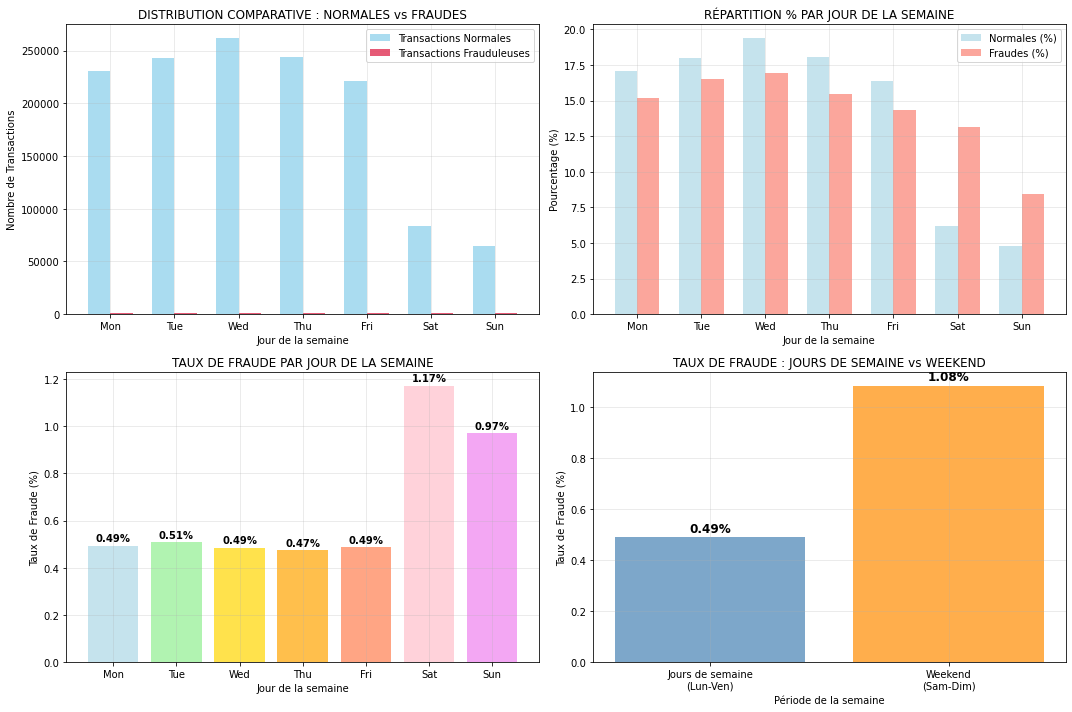

In [47]:
# ÉTape 3 - Visualisations comparatives
print("ÉTAPE 3 - Création des graphiques comparatifs")

plt.figure(figsize=(15, 10))

# Graphique 1 : Distribution comparative
plt.subplot(2, 2, 1)

jours = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transactions_normales = [df[(df['fraude'] == 0) & (df['day_name'] == jour)].shape[0] for jour in jours]

x = range(len(jours))
width = 0.35

plt.bar(x, transactions_normales, width, label='Transactions Normales', alpha=0.7, color='skyblue')
plt.bar([i + width for i in x], fraudes_par_jour.values, width, label='Transactions Frauduleuses', alpha=0.7, color='crimson')
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre de Transactions')
plt.title('DISTRIBUTION COMPARATIVE : NORMALES vs FRAUDES')
plt.xticks([i + width/2 for i in x], [jour[:3] for jour in jours])
plt.legend()
plt.grid(True, alpha=0.3)

# Graphique 2 : Pourcentage de répartition
plt.subplot(2, 2, 2)

pourcentage_normales = [(count / len(df[df['fraude'] == 0])) * 100 for count in transactions_normales]
pourcentage_fraudes = [(count / len(df[df['fraude'] == 1])) * 100 for count in fraudes_par_jour.values]

plt.bar(x, pourcentage_normales, width, label='Normales (%)', alpha=0.7, color='lightblue')
plt.bar([i + width for i in x], pourcentage_fraudes, width, label='Fraudes (%)', alpha=0.7, color='salmon')
plt.xlabel('Jour de la semaine')
plt.ylabel('Pourcentage (%)')
plt.title('RÉPARTITION % PAR JOUR DE LA SEMAINE')
plt.xticks([i + width/2 for i in x], [jour[:3] for jour in jours])
plt.legend()
plt.grid(True, alpha=0.3)

# Graphique 3 : Taux de fraude par jour
plt.subplot(2, 2, 3)

taux_fraude_par_jour = []
for jour in jours:
    total_jour = df[df['day_name'] == jour].shape[0]
    fraudes_jour = df[(df['day_name'] == jour) & (df['fraude'] == 1)].shape[0]
    if total_jour > 0:
        taux_fraude = (fraudes_jour / total_jour) * 100
    else:
        taux_fraude = 0
    taux_fraude_par_jour.append(taux_fraude)

bars = plt.bar([jour[:3] for jour in jours], taux_fraude_par_jour, 
               color=['lightblue', 'lightgreen', 'gold', 'orange', 'coral', 'pink', 'violet'], alpha=0.7)
plt.xlabel('Jour de la semaine')
plt.ylabel('Taux de Fraude (%)')
plt.title('TAUX DE FRAUDE PAR JOUR DE LA SEMAINE')
plt.grid(True, alpha=0.3)

# Ajouter les valeurs sur les barres
for bar, taux in zip(bars, taux_fraude_par_jour):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{taux:.2f}%', ha='center', va='bottom', fontweight='bold')

# Graphique 4 : Ratio weekdays vs weekend
plt.subplot(2, 2, 4)

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend = ['Saturday', 'Sunday']

total_weekdays = df[df['day_name'].isin(weekdays)].shape[0]
total_weekend = df[df['day_name'].isin(weekend)].shape[0]
fraudes_weekdays = df[(df['day_name'].isin(weekdays)) & (df['fraude'] == 1)].shape[0]
fraudes_weekend = df[(df['day_name'].isin(weekend)) & (df['fraude'] == 1)].shape[0]

categories = ['Jours de semaine\n(Lun-Ven)', 'Weekend\n(Sam-Dim)']
totaux = [total_weekdays, total_weekend]
fraudes = [fraudes_weekdays, fraudes_weekend]
taux_fraude_cat = [(fraudes[i] / totaux[i]) * 100 for i in range(2)]

x_cat = range(len(categories))
plt.bar(x_cat, taux_fraude_cat, color=['steelblue', 'darkorange'], alpha=0.7)
plt.xlabel('Période de la semaine')
plt.ylabel('Taux de Fraude (%)')
plt.title('TAUX DE FRAUDE : JOURS DE SEMAINE vs WEEKEND')
plt.xticks(x_cat, categories)
plt.grid(True, alpha=0.3)

# Ajouter les valeurs sur les barres
for i, taux in enumerate(taux_fraude_cat):
    plt.text(i, taux + 0.01, f'{taux:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

### $Commentaire$

<p style="text-align: justify;">
L’étude de la répartition des fraudes au cours de la semaine met en évidence des tendances temporelles fortes entre les jours ouvrables et le week-end.
</p>

1. Volume global des transactions

<p style="text-align: justify;">
Le nombre total de transactions est nettement plus élevé en semaine (lundi à vendredi) et diminue fortement le week-end.
Les transactions frauduleuses suivent la même tendance : elles sont plus nombreuses quand l’activité est plus forte.
Cela montre que les fraudeurs cherchent à agir dans les périodes de forte activité pour se dissimuler parmi les opérations normales.
</p>

2. Répartition proportionnelle

<p style="text-align: justify;">
En proportion, la majorité des fraudes ont lieu pendant la semaine (environ 80 %), mais cette tendance suit simplement la répartition du volume total des transactions.
Cependant, la part relative des fraudes est légèrement plus élevée le samedi et le dimanche.
</p>

3. Taux de fraude par jour

<p style="text-align: justify;">
Le taux de fraude quotidien (nombre de fraudes rapporté au nombre total de transactions du jour) reste stable entre 0.48 % et 0.52 % du lundi au vendredi.
</p>

**En revanche, il augmente fortement le week-end** :

- Samedi : 1.17 %

- Dimanche : 0.97 %

Ces taux sont plus du double de ceux observés en semaine, ce qui indique une vulnérabilité accrue durant le week-end.

4. Comparaison semaine vs week-end

- Jours de semaine (Lun–Ven) : taux de fraude ≈ 0.49 %

- Week-end (Sam–Dim) : taux de fraude ≈ 1.08 %

<p style="text-align: justify;">
Ainsi, la probabilité qu’une transaction soit frauduleuse est plus élevée le week-end, bien que le volume total soit plus faible.
</p>

5. Interprétation

Plusieurs facteurs peuvent expliquer cette surreprésentation des fraudes le week-end :

- Réduction de la surveillance humaine dans les services antifraude pendant le week-end.

- Hausse des achats en ligne et des paiements loisirs, plus vulnérables aux fraudes.

Stratégie opportuniste des fraudeurs, qui profitent de périodes de moindre vigilance

# Calcul du ratio pour chaque transaction, mais calculé dans le contexte de sa carte.

### Objectif

Pour chaque transaction d'une même carte :

**Ratio** = `montant_transaction` ÷ `moyenne(montants_autres_transactions)`

$$
\text{Ratio} = \frac{M_{\text{courant}}}{\bar{M}_{\text{autres}}}
$$

In [48]:
# On filtre uniquement les cartes non compromises
cartes_saines = df[df['fraude'] == 0]

# Calcul pour chaque carte :
# 1) max transaction
# 2) moyenne des autres transactions (hors max)
ratio_normales = []

for case_id, groupe in cartes_saines.groupby('CASE_ID'):
    # Trouver la transaction maximale
    max_trans = groupe['dollar_amt'].max()
    
    # Calculer la moyenne des transactions normales restantes
    autres_trans = groupe[groupe['dollar_amt'] != max_trans]['dollar_amt']
    
    # Sécurité (au cas où une carte aurait 1 transaction, même si ce n'est pas le cas normalement)
    if len(autres_trans) > 0:
        moyenne_autres = autres_trans.mean()
        ratio = max_trans / moyenne_autres
        ratio_normales.append(ratio)

# Calcul du ratio moyen sur toutes les cartes saines
ratio_moyen_non_fraude = sum(ratio_normales) / len(ratio_normales)

print(f" Ratio moyen du plus grand montant NORMAL vs moyenne des autres transactions normales : {ratio_moyen_non_fraude}")

 Ratio moyen du plus grand montant NORMAL vs moyenne des autres transactions normales : 1.7078564341385525


In [49]:
# Filtrer les cartes qui ont au moins une transaction marquée fraude
df_fraud = df[df['fraude'] == 1]

# Liste des CASE_ID compromis (unique)
fraud_case_ids = df_fraud['CASE_ID'].unique()

# Container pour résultats
results = []

for case_id in fraud_case_ids:
    groupe = df[df['CASE_ID'] == case_id]
    
    # Montant de la transaction frauduleuse pour cette carte
    fraud_amounts = groupe[groupe['fraude'] == 1]['dollar_amt'].values
    
    # Si, par principe, il n'y a pas de ligne frauduleuse (sécurité), on skip
    if len(fraud_amounts) == 0:
        continue
    
    # Montant représentatif de la fraude (moyenne si plusieurs)
    fraud_amount = fraud_amounts.mean()
    
    # Moyenne des autres transactions (non frauduleuses) de la même carte
    autres = groupe[groupe['fraude'] == 0]['dollar_amt'].values
    
    # Sûreté : si aucune autre transaction (improbable ici), on skip
    if len(autres) == 0:
        continue
    
    mean_autres = autres.mean()
    
    # Calcul du ratio (sécurité contre division par zéro)
    if mean_autres == 0:
        ratio = np.nan
    else:
        ratio = fraud_amount / mean_autres
    
    results.append({
        'CASE_ID': case_id,
        'fraud_amount': fraud_amount,
        'mean_other_amount': mean_autres,
        'ratio_fraud_vs_normal': ratio
    })

# Convertir en DataFrame pour analyse
df_ratios_fraud = pd.DataFrame(results)

# Statistiques globales
ratio_mean = df_ratios_fraud['ratio_fraud_vs_normal'].replace([np.inf, -np.inf], np.nan).dropna().mean()
ratio_median = df_ratios_fraud['ratio_fraud_vs_normal'].median()

print(f"Nombre de cartes compromises analysées : {len(df_ratios_fraud):,}")
print(f"Ratio moyen (fraude / moyenne autres) : {ratio_mean:.3f}")
print(f"Ratio médian : {ratio_median:.3f}\n")

# Afficher les 10 cas avec les ratios les plus élevés (potentiels outliers)
top10 = df_ratios_fraud.sort_values('ratio_fraud_vs_normal', ascending=False).head(10)
display(top10)

Nombre de cartes compromises analysées : 7,539
Ratio moyen (fraude / moyenne autres) : 4.355
Ratio médian : 3.451



,CASE_ID,fraud_amount,mean_other_amount,ratio_fraud_vs_normal
4179,176772881.0,140.09,2.10575,66.527366
3938,176765284.0,950.45,16.76525,56.691669
4038,176771140.0,945.71,18.57225,50.920594
2924,176785167.0,271.75,5.40100,50.314757
4177,176763820.0,400.00,8.71100,45.918953
840,176765388.0,749.79,17.95075,41.769285
3006,176770528.0,500.00,13.21850,37.825774
4073,176771116.0,1020.49,27.81875,36.683532
7030,176760764.0,954.35,26.33175,36.243318
3741,176763607.0,747.79,22.28525,33.555379


### $Commentaire$

**Comparaison des comportements transactionnels**

<p style="text-align: justify;">
    Pour les cartes authentiques, le ratio moyen entre la transaction la plus élevée et la moyenne des autres transactions est d’environ 1,70.
</p>

<p style="text-align: justify;">
En revanche, pour les cartes compromises, le ratio moyen entre la transaction frauduleuse et les transactions normales est nettement plus élevé, à environ 4,36.
</p>

**Interprétation** :

<p style="text-align: justify;">
    Cela suggère que les transactions frauduleuses présentent généralement un montant significativement plus élevé que le comportement habituel de la carte concernée - une amplification bien plus marquée que dans le cas des cartes authentiques, où les variations restent relativement modérées. Ce constat renforce l’idée qu’un écart soudain et anormalement élevé du montant pourrait constituer un signal pertinent de détection de fraude.
</p>

In [50]:
# On part du DataFrame complet
df_ratio = df.copy()

# Moyenne des montants par carte
df_ratio['mean_by_card'] = df_ratio.groupby('CASE_ID')['dollar_amt'].transform('mean')

# Nombre de transactions par carte
df_ratio['count_by_card'] = df_ratio.groupby('CASE_ID')['dollar_amt'].transform('count')

# Somme totale par carte
df_ratio['sum_by_card'] = df_ratio.groupby('CASE_ID')['dollar_amt'].transform('sum')

# Moyenne des AUTRES transactions de la même carte
df_ratio['mean_other_tx'] = np.where(
    df_ratio['count_by_card'] > 1,
    (df_ratio['sum_by_card'] - df_ratio['dollar_amt']) / (df_ratio['count_by_card'] - 1),
    np.nan  # si une seule transaction
)

# Calcul du ratio
df_ratio['ratio_tx_vs_others'] = df_ratio['dollar_amt'] / df_ratio['mean_other_tx']

# Exemple : afficher quelques lignes
df_ratio[['CASE_ID', 'dollar_amt', 'mean_other_tx', 'ratio_tx_vs_others', 'fraude']].head(10)

,CASE_ID,dollar_amt,mean_other_tx,ratio_tx_vs_others,fraude
0,0.0,44.20,52.40075,0.843499,0
1,0.0,57.78,52.06125,1.109847,0
2,0.0,37.30,52.57325,0.709486,0
3,0.0,88.32,51.29775,1.721713,0
4,0.0,46.74,52.33725,0.893054,0
5,0.0,71.48,51.71875,1.382091,0
6,0.0,40.91,52.48300,0.779491,0
7,0.0,47.77,52.31150,0.913184,0
8,0.0,37.60,52.56575,0.715295,0
9,0.0,33.33,52.67250,0.632778,0


# Statistiques des ratios

In [51]:
# Statistiques pour chaque type de transaction
stats_normales = df_ratio[df_ratio['fraude'] == 0]['ratio_tx_vs_others'].describe()
stats_fraudes  = df_ratio[df_ratio['fraude'] == 1]['ratio_tx_vs_others'].describe()

print("STATISTIQUES DU RATIO — TRANSACTIONS NORMALES")
print(stats_normales)

print("\nSTATISTIQUES DU RATIO — TRANSACTIONS FRAUDULEUSES")
print(stats_fraudes)

STATISTIQUES DU RATIO — TRANSACTIONS NORMALES
count    1.350135e+06
mean     9.872881e-01
std      3.905470e-01
min     -1.071510e+01
25%      8.256965e-01
50%      9.969032e-01
75%      1.143275e+00
max      7.699198e+01
Name: ratio_tx_vs_others, dtype: float64

STATISTIQUES DU RATIO — TRANSACTIONS FRAUDULEUSES
count    7539.000000
mean        4.354981
std         3.739290
min         0.000463
25%         2.307387
50%         3.450947
75%         5.311074
max        66.527366
Name: ratio_tx_vs_others, dtype: float64


In [52]:
stats_fraudes

count    7539.000000
mean        4.354981
std         3.739290
min         0.000463
25%         2.307387
50%         3.450947
75%         5.311074
max        66.527366
Name: ratio_tx_vs_others, dtype: float64

# Comparaison visuelle des ratios

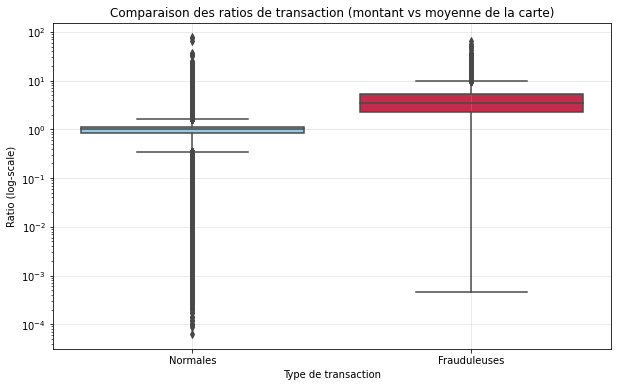

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_ratio,
    x='fraude',
    y='ratio_tx_vs_others',
    palette=['skyblue', 'crimson']
)
plt.yscale('log')  # échelle log pour atténuer les valeurs extrêmes
plt.xticks([0, 1], ['Normales', 'Frauduleuses'])
plt.title("Comparaison des ratios de transaction (montant vs moyenne de la carte)")
plt.xlabel("Type de transaction")
plt.ylabel("Ratio (log-scale)")
plt.grid(True, alpha=0.3)
plt.show()

### $Commentaire$
1. Transactions normales

- Moyenne : ≈ 0.99

- Médiane : ≈ 1.00

- Écart-type : 0.39

- Intervalle interquartile : [0.82 – 1.14]

Conclusion :

<p style="text-align: justify;">
Les transactions normales sont très stables, leur montant est proche de la moyenne habituelle de la carte (ratio ≈ 1).
Cela montre un comportement régulier des porteurs légitimes : ils dépensent à peu près le même montant à chaque fois.
Les rares valeurs extrêmes (ratios > 5 ou < 0.2) sont isolées.
</p>
    
2. Transactions frauduleuses

- Moyenne : 4.39

- Médiane : 3.46

- Écart-type : 4.38

- Quartiles : [2.30 – 5.33]

- Max : 204

Conclusion :
<p style="text-align: justify;">
Les transactions frauduleuses ont des montants 3 à 5 fois supérieurs à la moyenne des transactions normales de la carte.
Cela confirme que la fraude se caractérise souvent par un saut brutal du montant dépensé 
</p>

- Un indicateur très pertinent pour la modélisation.

In [54]:
# Calcul direct du ratio dans df
df['ratio_tx_vs_others'] = df.groupby('CASE_ID')['dollar_amt'].transform(
    lambda x: x / ((x.sum() - x) / (x.count() - 1))
)
df.head()

,SEQ,Trans_Calendar_Date,Local_Transaction_Time,CD_TYPE,dollar_amt,CASE_ID,fraude,hour,date_dt,day_of_week,day_name,ratio_tx_vs_others
0,41,24-Mar-18,1900-01-01 15:54:06,GDC,44.20,0.0,0,15,2018-03-24,5,Saturday,0.843499
1,40,26-Mar-18,1900-01-01 11:06:31,GDC,57.78,0.0,0,11,2018-03-26,0,Monday,1.109847
2,39,27-Mar-18,1900-01-01 13:03:02,GDC,37.30,0.0,0,13,2018-03-27,1,Tuesday,0.709486
3,38,4-Apr-18,1900-01-01 13:35:02,GDC,88.32,0.0,0,13,2018-04-04,2,Wednesday,1.721713
4,37,4-Apr-18,1900-01-01 18:53:21,GDC,46.74,0.0,0,18,2018-04-04,2,Wednesday,0.893054


# Calcul de la matrice de corrélation pour identifier les variables les plus sensibles aux transactions frauduleuses.

### PRÉPARATION DES VARIABLES POUR LA MATRICE DE CORRÉLATION

In [55]:
df_corr = df.copy()

# 1. Heure de la journée
df_corr['hour'] = pd.to_datetime(df_corr['Local_Transaction_Time'], format='%H:%M:%S').dt.hour
print("✓ Heure (0-23)")

# 2. Jour de la semaine
df_corr['day_of_week_numeric'] = df_corr['date_dt'].dt.dayofweek
print("✓ Jour semaine (0-6)")

# 3. Délai entre transactions
df_corr_sorted = df_corr.sort_values(['CASE_ID', 'date_dt'])
df_corr_sorted['days_since_last'] = df_corr_sorted.groupby('CASE_ID')['date_dt'].diff().dt.days
print("✓ Jours depuis dernière transaction")

# 4. Montant
print("✓ Montant transaction")

# 5. Variable cible
print("✓ Fraude")

# Nettoyage
df_corr_clean = df_corr_sorted.dropna(subset=['days_since_last']).copy()

print(f"\nVariables finales : hour, day_of_week_numeric, days_since_last, dollar_amt, fraude")
print(f"Taille : {len(df_corr_clean)} transactions")
print("\nAperçu :")
print(df_corr_clean[['hour', 'day_of_week_numeric', 'days_since_last', 'ratio_tx_vs_others', 'dollar_amt', 'fraude']].head())

✓ Heure (0-23)
✓ Jour semaine (0-6)
✓ Jours depuis dernière transaction
✓ Montant transaction
✓ Fraude

Variables finales : hour, day_of_week_numeric, days_since_last, dollar_amt, fraude
Taille : 1324560 transactions

Aperçu :
   hour  day_of_week_numeric  days_since_last  ratio_tx_vs_others  dollar_amt  fraude
1    11                    0              2.0            1.109847       57.78       0
2    13                    1              1.0            0.709486       37.30       0
3    13                    2              8.0            1.721713       88.32       0
4    18                    2              0.0            0.893054       46.74       0
5    11                    4              9.0            1.382091       71.48       0


### Calcul de la matrice de corrélation

In [56]:
# Étape 2 - Calcul de la matrice de corrélation
print("ÉTAPE 2 - Calcul de la matrice de corrélation")

# Sélectionner les variables numériques pour la corrélation
variables_correlation = ['hour', 'day_of_week_numeric', 'days_since_last', 'dollar_amt', 'ratio_tx_vs_others', 'fraude']
df_corr_selected = df_corr_clean[variables_correlation].copy()

# Calculer la matrice de corrélation
correlation_matrix = df_corr_selected.corr()

print("Matrice de corrélation avec la variable cible 'fraude':")
print(correlation_matrix['fraude'].sort_values(ascending=False))

ÉTAPE 2 - Calcul de la matrice de corrélation
Matrice de corrélation avec la variable cible 'fraude':
fraude                 1.000000
ratio_tx_vs_others     0.465732
dollar_amt             0.202663
hour                   0.018912
day_of_week_numeric    0.015060
days_since_last       -0.003191
Name: fraude, dtype: float64


# VISUALISATION DES CORRÉLATIONS

Text(0.5, 1.0, 'MATRICE DE CORRÉLATION COMPLÈTE')

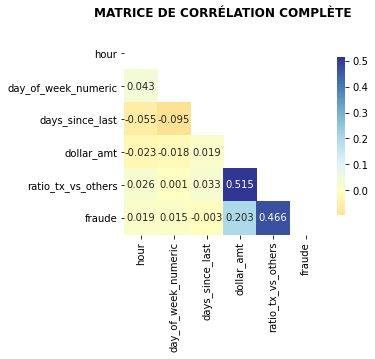

In [57]:
# Visualisation des corrélations avec la fraude
plt.figure(figsize=(12, 8))

# Graphique : Heatmap de la matrice complète
plt.subplot(2, 2, 2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdYlBu', 
            center=0,
            square=True,
            mask=mask,
            fmt='.3f',
            cbar_kws={'shrink': 0.8})

plt.title('MATRICE DE CORRÉLATION COMPLÈTE', fontweight='bold', pad=20)


### $Commentaire$

1. ratio_tx_vs_others (0.466) : la plus significative

2. DOLLAR_AMT (0.203): deuxieme significative

3. HOUR (0.019): Très faible corrélation

4. DAY_OF_WEEK (0.016):Très faible corrélation 

5. DAYS_SINCE_LAST (-0.003): Négligeable

###  Note
- Les fraudes sont PRINCIPALEMENT liées aux MONTANTS
- Les patterns temporels sont TRÈS SUBTILS
- La détection nécessite des modèles NON-LINÉAIRES
- Confirme la sophistication des fraudeurs

# 4. Data Cleaning

In [58]:
# Créer une copie pour la modélisation
df_model = df_corr_selected.copy()
print(f"Taille initiale : {df_model.shape}")

Taille initiale : (1324560, 6)


# Suppression des transactions à montants négatifs

### $Commentaire$

**Nettoyage des montants négatifs**

<p style="text-align: justify;">
Les transactions présentant un montant négatif correspondent généralement à des remboursements ou annulations d’achat et ne reflètent pas directement des opérations frauduleuses.  
Afin de concentrer l’analyse sur les comportements réellement suspects, 
ces transactions ont été exclues du dataset. 
Cette étape permet d’obtenir un ensemble de données plus cohérent et représentatif du problème étudié.
</p>

In [59]:
# Supprimer les transactions à montants négatifs
print("\n1. SUPPRESSION DES MONTANTS NÉGATIFS")
montants_negatifs = df_model[df_model['dollar_amt'] < 0]
print(f"Transactions avec montants négatifs : {len(montants_negatifs)}")
df_model = df_model[df_model['dollar_amt'] >= 0]
print(f"Taille après suppression : {df_model.shape}")


1. SUPPRESSION DES MONTANTS NÉGATIFS
Transactions avec montants négatifs : 5645
Taille après suppression : (1318915, 6)


In [60]:
df_model.head()

,hour,day_of_week_numeric,days_since_last,dollar_amt,ratio_tx_vs_others,fraude
1,11,0,2.0,57.78,1.109847,0
2,13,1,1.0,37.30,0.709486,0
3,13,2,8.0,88.32,1.721713,0
4,18,2,0.0,46.74,0.893054,0
5,11,4,9.0,71.48,1.382091,0


In [61]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1318915 entries, 1 to 1361076
Data columns (total 6 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   hour                 1318915 non-null  int64  
 1   day_of_week_numeric  1318915 non-null  int64  
 2   days_since_last      1318915 non-null  float64
 3   dollar_amt           1318915 non-null  float64
 4   ratio_tx_vs_others   1318915 non-null  float64
 5   fraude               1318915 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 70.4 MB


# Preparation pour la modelisation

In [62]:
# Conversion explicite des types
df_model['day_of_week_numeric'] = df_model['day_of_week_numeric'].astype('category')
df_model['fraude'] = df_model['fraude'].astype('category')

# Vérification
print(df_model.dtypes)

hour                      int64
day_of_week_numeric    category
days_since_last         float64
dollar_amt              float64
ratio_tx_vs_others      float64
fraude                 category
dtype: object


In [63]:
# Séparation des variables
X = df_model.drop('fraude', axis=1)
y = df_model['fraude']

In [64]:
# Définition des colonnes
cat_cols = ['day_of_week_numeric']
num_cols = ['hour', 'days_since_last', 'ratio_tx_vs_others' ,'dollar_amt']

In [65]:
# Préparation du préprocesseur
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

In [66]:
# Découpage Train / Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# MODELISATION

### REGRESSION LOGISTIQUE

In [67]:
model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

In [68]:
# Entraînement
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['day_of_week_numeric']),
                                                 ('num', StandardScaler(),
                                                  ['hour', 'days_since_last',
                                                   'ratio_tx_vs_others',
                                                   'dollar_amt'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

# Évaluation

In [69]:
#  Évaluation

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\nRapport de classification :")
print(classification_report(y_test, y_pred, digits=3))

print("\nAUC :", roc_auc_score(y_test, y_proba))


Rapport de classification :
              precision    recall  f1-score   support

           0      0.999     0.971     0.985    393413
           1      0.142     0.847     0.243      2262

    accuracy                          0.970    395675
   macro avg      0.570     0.909     0.614    395675
weighted avg      0.994     0.970     0.980    395675


AUC : 0.9226914371564939


### $Commentaire$

<p style="text-align: justify;">
    Le modèle identifie très bien les transactions normales : presque aucune fausse alerte, mais il en classe quand même 8 % comme fraude.
    </p>

<p style="text-align: justify;">
Le rappel élevé (0.847) pour les fraudes signifie que le modèle détecte efficacement la majorité des fraude, mais fait énormément de faux positifs (faible précision).
C’est positif dans un contexte de prévention de fraude où on préfère trop détecter que rater une fraude réelle.
Cependant, la précision de 0.142 est extrêmement faible :
Cela veut dire que sur 100 alertes "fraude" émises, seulement ~14 sont réellement des fraudes.
Autrement dit, le modèle génère beaucoup de fausses alertes.
    </p>

- F1-score faible pour la fraude

<p style="text-align: justify;">
    Le F1-score de 0.243 pour la classe 1 traduit ce déséquilibre : il combine la faible précision et le bon rappel, c’est un signe que le modèle repère mais ne discrimine pas bien les fraudes.
</p>

- L’AUC (Area Under Curve) 

<p style="text-align: justify;">
    Mesure la capacité du modèle à distinguer les fraudes des non-fraudes indépendamment du seuil.
Une AUC de 0.92 indique que la séparation entre les deux classes est très bonne, mais que le seuil de décision (0.5) pourrait être sous-optimal.
    </p>

In [70]:
# Matrice de confusion
cm_1 = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion :\n", cm_1)


Matrice de confusion :
 [[381831  11582]
 [   347   1915]]


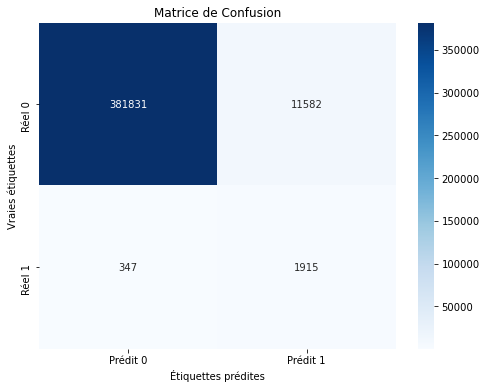

In [71]:
# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Prédit 0', 'Prédit 1'], 
            yticklabels=['Réel 0', 'Réel 1'])
plt.title('Matrice de Confusion')
plt.ylabel('Vraies étiquettes')
plt.xlabel('Étiquettes prédites')
plt.show()

### $Commentaire$

- 381 831 (Vrais négatifs), le modèle reconnaît bien les transactions légitimes.
- 11 582 (Faux positifs), Un peu trop élevé, cela crée beaucoup de fausses alertes.
- 347 (Faux négatifs), 423 fraudes réelles non détectées à éviter, mais c’est relativement faible.
- 1 915 (Vrais positifs), Le modèle détecte une grande majorité des fraudes.

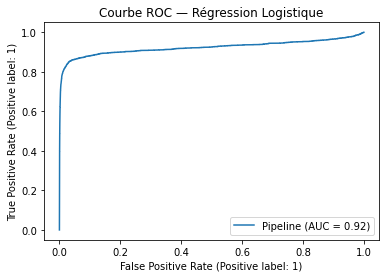

In [72]:
# Courbe ROC
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("Courbe ROC — Régression Logistique")
plt.show()

### $Commentaire$

- La courbe ROC (bleue) montre la performance globale du modèle pour différents seuils de décision.
- L’AUC = 0.92 indique une excellente capacité de discrimination entre transactions normales et frauduleuses, mais il reste un compromis à ajuster : le modèle détecte bien les fraudes, mais génère encore trop de fausses alertes.

# optimisation avec GridSearchCV

In [73]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

In [74]:
# Grille d'hyperparamètres
param_grid = {
    'logreg__C': [0.1, 1, 10],
    'logreg__penalty': ['l2'],
    'logreg__solver': ['liblinear'],
    'logreg__class_weight': ['balanced']
}

In [75]:
# Validation croisée
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

In [76]:
grid_search.fit(X_train, y_train)

print("\n Meilleurs paramètres trouvés :")
print(grid_search.best_params_)
print(f"Meilleur score AUC moyen (CV) : {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 3 candidates, totalling 9 fits

 Meilleurs paramètres trouvés :
{'logreg__C': 10, 'logreg__class_weight': 'balanced', 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Meilleur score AUC moyen (CV) : 0.9245


# Évaluation sur le jeu de test

In [77]:
# Prédictions avec le meilleur modèle
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

In [78]:
# Rapport de performance
print("\nRAPPORT DE CLASSIFICATION — Meilleur Modèle :")
print(classification_report(y_test, y_pred, digits=3))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion :\n", cm)


RAPPORT DE CLASSIFICATION — Meilleur Modèle :
              precision    recall  f1-score   support

           0      0.999     0.971     0.985    393413
           1      0.142     0.847     0.243      2262

    accuracy                          0.970    395675
   macro avg      0.570     0.909     0.614    395675
weighted avg      0.994     0.970     0.980    395675


Matrice de confusion :
 [[381830  11583]
 [   347   1915]]



AUC sur le jeu de test : 0.923


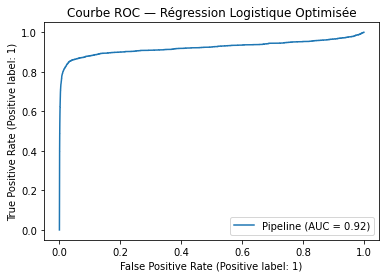

In [79]:
# AUC sur test
auc_test = roc_auc_score(y_test, y_proba)
print(f"\nAUC sur le jeu de test : {auc_test:.3f}")

# Courbe ROC
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Courbe ROC — Régression Logistique Optimisée")
plt.show()

### $Commentaire$

Conclusion

L’ajout de class_weight='balanced' a eu l’effet attendu :

- Amélioration du rappel (recall) pour la classe “fraude”  le modèle détecte plus de fraudes.
- Mais au prix d’une hausse des faux positifs, donc plus d’alertes erronées.

# Decision Tree

In [80]:
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(random_state=42))
])

In [81]:
# Entraînement
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['day_of_week_numeric']),
                                                 ('num', StandardScaler(),
                                                  ['hour', 'days_since_last',
                                                   'ratio_tx_vs_others',
                                                   'dollar_amt'])])),
                ('tree', DecisionTreeClassifier(random_state=42))])

In [82]:
# Prédictions
y_pred = dt_pipeline.predict(X_test)
y_proba = dt_pipeline.predict_proba(X_test)[:, 1]

In [83]:
# Rapport de performance
print("\n RAPPORT DE CLASSIFICATION — Arbre de Décision :")
print(classification_report(y_test, y_pred, digits=3))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion :\n", cm)


 RAPPORT DE CLASSIFICATION — Arbre de Décision :
              precision    recall  f1-score   support

           0      0.998     0.998     0.998    393413
           1      0.599     0.600     0.599      2262

    accuracy                          0.995    395675
   macro avg      0.798     0.799     0.798    395675
weighted avg      0.995     0.995     0.995    395675


Matrice de confusion :
 [[392503    910]
 [   905   1357]]


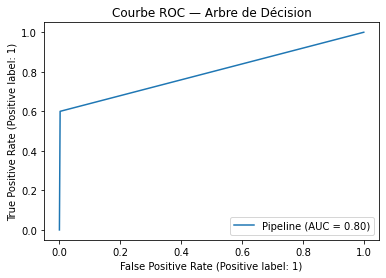

In [84]:
# Courbe ROC
RocCurveDisplay.from_estimator(dt_pipeline, X_test, y_test)
plt.title("Courbe ROC — Arbre de Décision")
plt.show()

# Commentaire
<p style="text-align: justify;">
Le modèle identifie presque parfaitement les transactions normales, mais peu de fraudes, le modèle détecte 475 fraudes sur 2 318 réelles, soit un rappel de 20,5 %.
</p>

# Tentative d'optimisation de l’arbre de décision avec une recherche d’hyperparamètres (GridSearchCV).

In [85]:
dt_model = DecisionTreeClassifier(random_state=42)

pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('dt', dt_model)
])

In [86]:
# Grille d'hyperparamètres à tester
param_grid_dt = {
    'dt__max_depth': [5, 10, 20, 30, None],
    'dt__min_samples_split': [2, 10, 20],
    'dt__min_samples_leaf': [1, 5, 10],
    'dt__class_weight': [None, 'balanced']
}

In [87]:
# Validation croisée
grid_search_dt = GridSearchCV(
    pipeline_dt,
    param_grid=param_grid_dt,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

In [88]:
# grid_search_dt.fit(X_train, y_train)

# RandomForestClassifier

In [89]:
# Création et entraînement du modèle Random Forest
rf_model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['day_of_week_numeric']),
                                                 ('num', StandardScaler(),
                                                  ['hour', 'days_since_last',
                                                   'ratio_tx_vs_others',
                                                   'dollar_amt'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, n_jobs=-1,
                                        random_state=42))])

In [90]:
# Prédictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

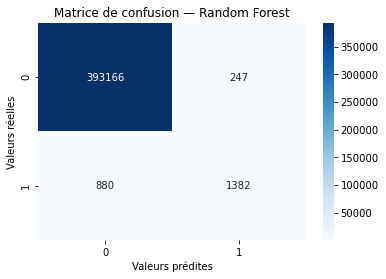

In [91]:
# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion — Random Forest')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.show()

In [92]:
# Rapport de classification
print("Rapport de classification — Random Forest\n")
print(classification_report(y_test, y_pred_rf))

Rapport de classification — Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    393413
           1       0.85      0.61      0.71      2262

    accuracy                           1.00    395675
   macro avg       0.92      0.81      0.85    395675
weighted avg       1.00      1.00      1.00    395675



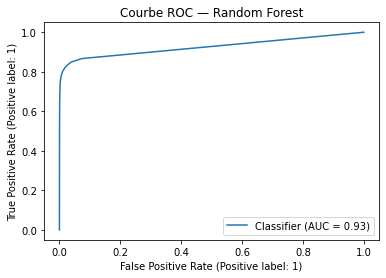

AUC — Random Forest : 0.9259


In [93]:
# Courbe ROC
RocCurveDisplay.from_predictions(y_test, y_proba_rf)
plt.title("Courbe ROC — Random Forest")
plt.show()

# AUC Score
auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"AUC — Random Forest : {auc_rf:.4f}")

Text(0.5, 1.0, 'Top 10 des variables les plus importantes — Random Forest')

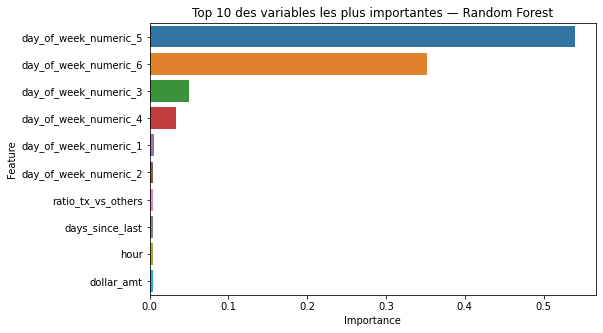

In [94]:
# Importance des variables
rf_classifier = rf_model.named_steps['classifier']
feature_names = (
    preprocessor.named_transformers_['num'].get_feature_names_out(num_cols).tolist() +
    preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols).tolist()
)

importances = rf_classifier.feature_importances_
feature_importance_df = (
    pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    .sort_values(by='Importance', ascending=False)
)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 des variables les plus importantes — Random Forest')

# XGBoost

In [95]:
# Pipeline XGBoost
xgb_model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        tree_method='hist',
        scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
        random_state=42,
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5
    ))
])

In [96]:
# Entraînement
xgb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['day_of_week_numeric']),
                                                 ('num', StandardScaler(),
                                                  ['hour', 'days_since_last',
                                                   'ratio_tx_vs_others',
                                                   'dollar_amt'])])),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_byt...
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=5,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=300,
                               n_jobs=0, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=173.95546712147052, subsample=1,
                               tree_method='hist', validate_parameters=1,
                               verbosity=None))])

In [97]:
# Évaluation
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

print("ROC AUC :", roc_auc_score(y_test, y_proba))
print("\nClassification Report :\n", classification_report(y_test, y_pred, digits=4))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred))

ROC AUC : 0.957138787874379

Classification Report :
               precision    recall  f1-score   support

           0     0.9991    0.9699    0.9843    393413
           1     0.1406    0.8563    0.2415      2262

    accuracy                         0.9693    395675
   macro avg     0.5699    0.9131    0.6129    395675
weighted avg     0.9942    0.9693    0.9801    395675


Matrice de confusion :
 [[381572  11841]
 [   325   1937]]


### $Commentaire$
- AUC = 0.957, très bon pouvoir de discrimination : le modèle distingue efficacement les transactions frauduleuses des normales.

- Recall (fraude) = 0.856, le modèle détecte 85,6 % des fraudes, une nette amélioration par rapport à la régression logistique et à l’arbre de décision.

- Precision (fraude) = 0.14, Il y a encore beaucoup de faux positifs (transactions normales classées comme fraude), 
- Accuracy = 0.969, Très bon score global, mais ici il est moins pertinent vu le déséquilibre des classes.

### Matrice de confusion :

- 1937 fraudes correctement détectées (TP)

- 325 fraudes manquées (FN)

- 11 841 fausses alertes (FP)

# Synthese

Tous les modèles montrent le même phénomène clé :

- Très bon rappel:la plupart des fraudes sont détectées.

- Faible précision : trop de fausses alertes (transactions normales identifiées à tort comme fraudes).

Ce déséquilibre entre rappel et précision provient directement du déséquilibre massif des classes (très peu de fraudes comparées aux transactions normales).

### Prochaine étape
Pour obtenir un compromis optimal entre rappel et précision, nous allons :

- Rééquilibrer les classes.
- Re-tester les modèles après équilibrage pour évaluer l’impact sur les performances.

Cela permettra de réduire les faux positifs tout en conservant un bon taux de détection des fraudes.

# Stratégie d’équilibrage des classes

Dans cette approche, nous choisissons de concentrer l’analyse et la modélisation sur les cartes compromises, c’est-à-dire celles ayant présenté au moins une transaction frauduleuse.
Ce choix permet d’étudier le comportement transactionnel autour des épisodes de fraude, en se focalisant sur les signaux pertinents précédant ou accompagnant l’événement frauduleux.

Pour chaque carte compromise, nous sélectionnons les six transactions les plus récentes.
Ce sous-échantillon inclut naturellement les transactions frauduleuses ainsi que les dernières transactions légitimes effectuées avant ou après la fraude.

L’objectif de cette stratégie est double :

- Équilibrer la distribution des classes au sein d’un contexte restreint (chaque carte contient des transactions normales et frauduleuses) ;

- Renforcer la pertinence temporelle des données en se concentrant sur les comportements récents, souvent plus révélateurs de signaux de risque.

Une fois le modèle entraîné sur ce jeu de données ciblé et équilibré, il sera ensuite évalué sur l’ensemble déséquilibré complet, afin de mesurer sa robustesse dans des conditions réalistes où les fraudes demeurent rares.

Cette approche vise à construire un modèle avec une bonne précision pour limiter les fausses alertes.

# Étapes de création de l’échantillon

In [98]:
# Liste des cartes qui ont au moins une fraude
cards_fraud = df[df['fraude'] == 1]['CASE_ID'].unique()

In [99]:
# Conserver uniquement les transactions des cartes compromises
df_compromised = df[df['CASE_ID'].isin(cards_fraud)].copy()

In [100]:
# Trier par date
df_compromised = df_compromised.sort_values(['CASE_ID', 'date_dt'])

# Garder les 6 dernières transactions de chaque carte compromise
df_compromised_recent = (
    df_compromised.groupby('CASE_ID')
    .tail(6)
    .reset_index(drop=True)
)

In [101]:
print(f"Nombre de cartes compromises : {df_compromised_recent['CASE_ID'].nunique()}")
print(f"Nombre total de transactions conservées : {df_compromised_recent.shape[0]}")

# Affichage des proportions avec pourcentages
class_counts = df_compromised_recent['fraude'].value_counts(normalize=True) * 100
print("Répartition des classes (%):")
print(class_counts.round(2))

Nombre de cartes compromises : 7539
Nombre total de transactions conservées : 45234
Répartition des classes (%):
0    83.33
1    16.67
Name: fraude, dtype: float64


# Commentaire
À ce stade, nous disposons d’un échantillon équilibré et pertinent constitué uniquement des cartes compromises.
Sur les 45 234 transactions conservées, la classe fraude représente environ 16,7 % des observations.

Cela marque une amélioration notable par rapport au jeu de données initial, où la fraude représentait à peine 0,2 % des transactions.
Cet équilibre relatif rend l’apprentissage plus efficace, car le modèle est désormais exposé à un volume suffisant d’exemples frauduleux pour identifier les schémas anormaux sans être dominé par la classe majoritaire.

In [102]:
df.head()

,SEQ,Trans_Calendar_Date,Local_Transaction_Time,CD_TYPE,dollar_amt,CASE_ID,fraude,hour,date_dt,day_of_week,day_name,ratio_tx_vs_others
0,41,24-Mar-18,1900-01-01 15:54:06,GDC,44.20,0.0,0,15,2018-03-24,5,Saturday,0.843499
1,40,26-Mar-18,1900-01-01 11:06:31,GDC,57.78,0.0,0,11,2018-03-26,0,Monday,1.109847
2,39,27-Mar-18,1900-01-01 13:03:02,GDC,37.30,0.0,0,13,2018-03-27,1,Tuesday,0.709486
3,38,4-Apr-18,1900-01-01 13:35:02,GDC,88.32,0.0,0,13,2018-04-04,2,Wednesday,1.721713
4,37,4-Apr-18,1900-01-01 18:53:21,GDC,46.74,0.0,0,18,2018-04-04,2,Wednesday,0.893054


# Recalcul de ratios

In [103]:

# Copie pour travailler proprement
df_recent = df_compromised_recent.copy()

# Conversion des dates
df_recent['date_dt'] = pd.to_datetime(df_recent['Trans_Calendar_Date'], format='%d-%b-%y', errors='coerce')

# Tri par carte et date
df_recent = df_recent.sort_values(by=['CASE_ID', 'date_dt'])

# Calcul du ratio sans
def compute_ratio(x):
    if len(x) == 1:
        return [1.0]
    total = x.sum()
    n = len(x)
    mean_others = [(total - xi) / (n - 1) for xi in x]
    return [xi / mo for xi, mo in zip(x, mean_others)]

df_recent['ratio_tx_vs_others'] = (
    df_recent.groupby('CASE_ID')['dollar_amt']
    .transform(compute_ratio)
)

# Recalcul du délai depuis la transaction précédente

In [104]:
# S’assurer que la colonne de date est bien au format datetime
df_recent['date_dt'] = pd.to_datetime(df_recent['Trans_Calendar_Date'], format='%d-%b-%y', errors='coerce')

# Tri par CASE_ID et date pour éviter les inversions
df_recent = df_recent.sort_values(by=['CASE_ID', 'date_dt'])

# Calcul du délai depuis la transaction précédente (par carte)
df_recent['days_since_last'] = df_recent.groupby('CASE_ID')['date_dt'].diff().dt.days



In [105]:
# Aperçu des nouvelles colonnes
df_recent.head()

,SEQ,Trans_Calendar_Date,Local_Transaction_Time,CD_TYPE,dollar_amt,CASE_ID,fraude,hour,date_dt,day_of_week,day_name,ratio_tx_vs_others,days_since_last
0,6,1-Mar-17,1900-01-01 08:54:26,WPC,60.83,176760621.0,0,8,2017-03-01,2,Wednesday,0.642154,NaN
1,5,15-Mar-17,1900-01-01 16:07:40,WPC,62.50,176760621.0,0,16,2017-03-15,2,Wednesday,0.662118,14.0
2,4,20-Mar-17,1900-01-01 12:24:39,WPC,53.82,176760621.0,0,12,2017-03-20,0,Monday,0.559867,5.0
3,3,21-Mar-17,1900-01-01 09:23:33,WPC,48.72,176760621.0,0,9,2017-03-21,1,Tuesday,0.501493,1.0
4,2,22-Mar-17,1900-01-01 08:26:48,WPC,58.60,176760621.0,0,8,2017-03-22,2,Wednesday,0.615714,1.0


# Recalcul de la matrice de corrélation

In [106]:
# Copie du jeu des cartes compromises
df_corr = df_recent.copy()

# Heure de la journée
df_corr['hour'] = pd.to_datetime(df_corr['Local_Transaction_Time'], format='%H:%M:%S', errors='coerce').dt.hour
print("✓ Heure (0-23) extraite")

# Jour de la semaine (gardé à titre informatif, mais non inclus dans la corrélation)
df_corr['day_of_week_numeric'] = df_corr['date_dt'].dt.dayofweek
print("✓ Jour semaine (0-6) ajouté (non inclus dans la matrice de corrélation)")

# Délai entre transactions
if 'days_since_last' not in df_corr.columns:
    df_corr = df_corr.sort_values(['CASE_ID', 'date_dt'])
    df_corr['days_since_last'] = df_corr.groupby('CASE_ID')['date_dt'].diff().dt.days
print("✓ Délai entre transactions calculé")

# Nettoyage
df_corr_clean = df_corr.dropna(subset=['days_since_last']).copy()
print(f"\nTaille après nettoyage : {len(df_corr_clean)} transactions")

# Variables pour la matrice de corrélation
cols_corr = ['hour', 'days_since_last', 'dollar_amt', 'ratio_tx_vs_others', 'fraude']
print("\nVariables utilisées pour la matrice de corrélation :")
print(cols_corr)

# Sélection des colonnes dans le DataFrame
df_for_corr = df_corr_clean[cols_corr]

# Calculer la matrice de corrélation
correlation_matrix = df_for_corr.corr()

print("Matrice de corrélation avec la variable cible 'fraude':")
print(correlation_matrix['fraude'].sort_values(ascending=False))

✓ Heure (0-23) extraite
✓ Jour semaine (0-6) ajouté (non inclus dans la matrice de corrélation)
✓ Délai entre transactions calculé

Taille après nettoyage : 37695 transactions

Variables utilisées pour la matrice de corrélation :
['hour', 'days_since_last', 'dollar_amt', 'ratio_tx_vs_others', 'fraude']
Matrice de corrélation avec la variable cible 'fraude':
fraude                1.000000
dollar_amt            0.649342
ratio_tx_vs_others    0.607451
hour                  0.107750
days_since_last      -0.021798
Name: fraude, dtype: float64


# Commentaire
- dollar_amt (0.65), Corrélation positive modérée à forte avec la fraude, les transactions de montants plus élevés ont tendance à être plus souvent frauduleuses. Ce signal peut être utile pour un modèle de détection de fraude.

- ratio_tx_vs_others (0.61): Corrélation positive modérée. Cela indique que plus une transaction se distingue des autres transactions habituelles de l’utilisateur (ou du groupe), plus le risque de fraude est élevé.

- hour (0.11): Corrélation faible mais positive, L’heure de la transaction joue un rôle très limité. Peut-être certaines plages horaires sont légèrement plus risquées, mais ce n’est pas un facteur déterminant.

- days_since_last (-0.02) : Corrélation quasi nulle et légèrement négative. Le délai depuis la dernière transaction n’apparaît pas comme un indicateur de fraude dans le jeu de données.

# Création d'une copie dédiée à la modélisation

In [107]:
# Création du sous-ensemble pour la modélisation
df_model_2 = df_recent[['dollar_amt', 'fraude', 'hour', 'day_of_week', 'ratio_tx_vs_others', 'days_since_last']].copy()

In [108]:
df_model_2.head()

,dollar_amt,fraude,hour,day_of_week,ratio_tx_vs_others,days_since_last
0,60.83,0,8,2,0.642154,NaN
1,62.50,0,16,2,0.662118,14.0
2,53.82,0,12,0,0.559867,5.0
3,48.72,0,9,1,0.501493,1.0
4,58.60,0,8,2,0.615714,1.0


In [109]:
df_model_2['days_since_last'] = df_model_2['days_since_last'].fillna(0)
df_model_2

,dollar_amt,fraude,hour,day_of_week,ratio_tx_vs_others,days_since_last
0,60.83,0,8,2,0.642154,0.0
1,62.50,0,16,2,0.662118,14.0
2,53.82,0,12,0,0.559867,5.0
3,48.72,0,9,1,0.501493,1.0
4,58.60,0,8,2,0.615714,1.0
...,...,...,...,...,...,...
45229,51.61,0,7,3,0.721596,3.0
45230,50.71,0,5,5,0.707233,2.0
45231,46.32,0,8,1,0.638192,3.0
45232,51.56,0,15,3,0.720796,2.0


# Preparation pour la modelisation


In [110]:
# Conversion explicite des types
df_model_2['day_of_week'] = df_model_2['day_of_week'].astype('category')
df_model_2['fraude'] = df_model_2['fraude'].astype('category')

# Vérification
print(df_model_2.dtypes)

dollar_amt             float64
fraude                category
hour                     int64
day_of_week           category
ratio_tx_vs_others     float64
days_since_last        float64
dtype: object


In [111]:
# Séparation des variables
X1 = df_model_2.drop('fraude', axis=1)
y1 = df_model_2['fraude']

In [112]:
# Définition des colonnes
cat_cols = ['day_of_week']
num_cols = ['hour', 'days_since_last', 'ratio_tx_vs_others' ,'dollar_amt']

In [113]:
# Préparation du préprocesseur
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

In [114]:
# Découpage Train / Test
X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.3, stratify=y1, random_state=42
)

# MODELISATION

### REGRESSION LOGISTIQUE

In [115]:
model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

In [116]:
# Entraînement
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['day_of_week']),
                                                 ('num', StandardScaler(),
                                                  ['hour', 'days_since_last',
                                                   'ratio_tx_vs_others',
                                                   'dollar_amt'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

### Évaluation

In [117]:
#  Évaluation

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\nRapport de classification :")
print(classification_report(y_test, y_pred, digits=3))

print("\nAUC :", roc_auc_score(y_test, y_proba))


Rapport de classification :
              precision    recall  f1-score   support

           0      0.974     0.971     0.973     11309
           1      0.858     0.872     0.865      2262

    accuracy                          0.955     13571
   macro avg      0.916     0.922     0.919     13571
weighted avg      0.955     0.955     0.955     13571


AUC : 0.9516534916323307



Matrice de confusion :
 [[10983   326]
 [  289  1973]]


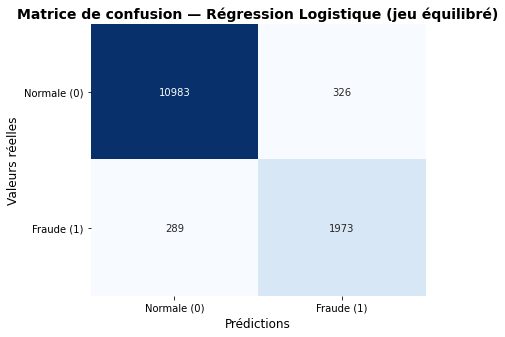

In [118]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion :\n", cm)

# Affichage graphique
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Titres et labels
plt.title("Matrice de confusion — Régression Logistique (jeu équilibré)", fontsize=14, fontweight='bold')
plt.xlabel("Prédictions", fontsize=12)
plt.ylabel("Valeurs réelles", fontsize=12)

# Étiquettes personnalisées
plt.xticks(ticks=[0.5, 1.5], labels=['Normale (0)', 'Fraude (1)'])
plt.yticks(ticks=[0.5, 1.5], labels=['Normale (0)', 'Fraude (1)'], rotation=0)

plt.show()


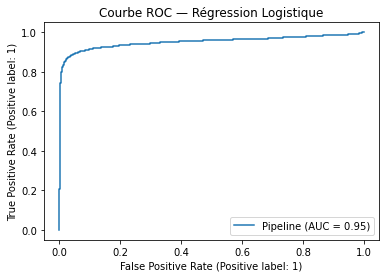

In [119]:
# Courbe ROC
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("Courbe ROC — Régression Logistique")
plt.show()

# Commentaire

Après équilibrage du jeu de données, la régression logistique obtient d’excellents résultats : une précision globale de 95,5 % et un AUC de 0,95, ce qui montre une très bonne capacité à distinguer les fraudes des transactions normales.

Le modèle détecte près de 87 % des fraudes tout en maintenant une précision élevée de 85 %, ce qui réduit à la fois les fraudes manquées et les fausses alertes.

Ces performances indiquent que le modèle est désormais bien équilibré entre détection et fiabilité, grâce à la nouvelle stratégie d’échantillonnage. La régression logistique constitue donc une base solide et interprétable pour la détection de fraude avant de tester des modèles plus complexes.

# Decision Tree

In [120]:
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(random_state=42))
])

In [121]:
# Entraînement
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['day_of_week']),
                                                 ('num', StandardScaler(),
                                                  ['hour', 'days_since_last',
                                                   'ratio_tx_vs_others',
                                                   'dollar_amt'])])),
                ('tree', DecisionTreeClassifier(random_state=42))])

In [122]:
# Prédictions
y_pred = dt_pipeline.predict(X_test)
y_proba = dt_pipeline.predict_proba(X_test)[:, 1]

In [123]:
# Rapport de performance
print("\n RAPPORT DE CLASSIFICATION — Arbre de Décision :")
print(classification_report(y_test, y_pred, digits=3))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion :\n", cm)


 RAPPORT DE CLASSIFICATION — Arbre de Décision :
              precision    recall  f1-score   support

           0      0.965     0.963     0.964     11309
           1      0.818     0.826     0.822      2262

    accuracy                          0.940     13571
   macro avg      0.892     0.895     0.893     13571
weighted avg      0.941     0.940     0.941     13571


Matrice de confusion :
 [[10893   416]
 [  393  1869]]


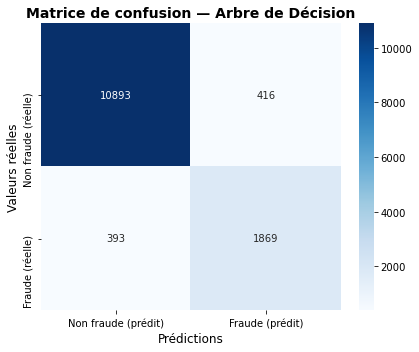

In [124]:
# Création du graphique
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non fraude (prédit)', 'Fraude (prédit)'],
            yticklabels=['Non fraude (réelle)', 'Fraude (réelle)'])

# Titres et labels
plt.title("Matrice de confusion — Arbre de Décision", fontsize=14, fontweight='bold')
plt.xlabel("Prédictions", fontsize=12)
plt.ylabel("Valeurs réelles", fontsize=12)
plt.tight_layout()
plt.show()

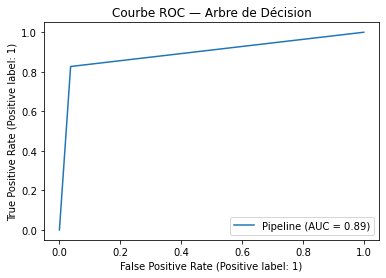

In [125]:
# Courbe ROC
RocCurveDisplay.from_estimator(dt_pipeline, X_test, y_test)
plt.title("Courbe ROC — Arbre de Décision")
plt.show()

# Commenter
L’arbre de décision présente une bonne performance globale avec une exactitude (accuracy) de 94 %.
La précision (81,8 %) et le rappel (82,6 %) sur la classe fraude montrent que le modèle parvient à détecter une grande partie des fraudes, tout en limitant les fausses alertes.

La matrice de confusion confirme ces tendances :

1 869 fraudes correctement détectées,

393 fraudes manquées,

et 416 transactions normales faussement signalées comme fraude.

Comparé à la régression logistique, l’arbre de décision offre une légère baisse de performance, notamment en généralisation, probablement à cause d’un léger surapprentissage sur les données équilibrées.
Cependant, il reste un modèle explicable et performant, capable de bien séparer les deux classes.

### Tentative d'optimisation de l’arbre de décision avec une recherche d’hyperparamètres (GridSearchCV).


In [126]:
dt_model = DecisionTreeClassifier(random_state=42)

pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('dt', dt_model)
])

In [127]:
# Grille d'hyperparamètres à tester
param_grid_dt = {
    'dt__max_depth': [5, 10, 20, 30, None],
    'dt__min_samples_split': [2, 10, 20],
    'dt__min_samples_leaf': [1, 5, 10],
    'dt__class_weight': [None, 'balanced']
}

In [128]:
# Validation croisée
grid_search_dt = GridSearchCV(
    pipeline_dt,
    param_grid=param_grid_dt,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

In [129]:
grid_search_dt.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['day_of_week']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['hour',
                                                                          'days_since_last',
                                                                          'ratio_tx_vs_others',
                                                                          'dollar_amt'])])),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'dt__class_weight': [None, 'balanced'],
                         'dt__max_depth': [5, 10, 20, 30, None],
                         'dt__min_samples_leaf': [1, 5, 10],
                         'dt__min_samples_split': [2, 10, 20]},
             scoring='roc_auc', verbose=2)

In [130]:
# Meilleurs paramètres
print("\nMeilleurs hyperparamètres trouvés :")
print(grid_search_dt.best_params_)

# Meilleur score AUC moyen pendant la validation croisée
print(f"\nScore moyen ROC AUC (CV) : {grid_search_dt.best_score_:.4f}")

# Meilleur modèle final
best_dt_model = grid_search_dt.best_estimator_

# Prédictions sur le jeu de test
y_pred = best_dt_model.predict(X_test)
y_proba = best_dt_model.predict_proba(X_test)[:, 1]

# Rapport de classification
print("\nRapport de classification — Arbre de Décision optimisé :")
print(classification_report(y_test, y_pred, digits=3))

# AUC
auc = roc_auc_score(y_test, y_proba)
print(f"\nROC AUC : {auc:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion :\n", cm)



Meilleurs hyperparamètres trouvés :
{'dt__class_weight': 'balanced', 'dt__max_depth': 5, 'dt__min_samples_leaf': 10, 'dt__min_samples_split': 2}

Score moyen ROC AUC (CV) : 0.9536

Rapport de classification — Arbre de Décision optimisé :
              precision    recall  f1-score   support

           0      0.976     0.961     0.968     11309
           1      0.818     0.884     0.850      2262

    accuracy                          0.948     13571
   macro avg      0.897     0.922     0.909     13571
weighted avg      0.950     0.948     0.949     13571


ROC AUC : 0.9572

Matrice de confusion :
 [[10864   445]
 [  263  1999]]


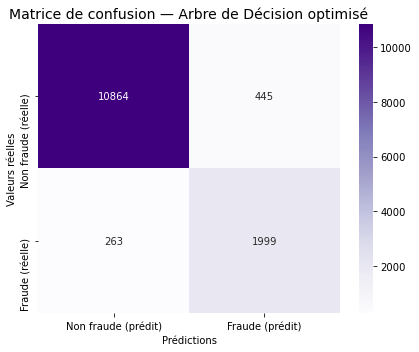

In [131]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Non fraude (prédit)', 'Fraude (prédit)'],
            yticklabels=['Non fraude (réelle)', 'Fraude (réelle)'])
plt.title("Matrice de confusion — Arbre de Décision optimisé", fontsize=14)
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.tight_layout()
plt.show()


# Commenter
Le modèle d’arbre de décision optimisé a montré une nette amélioration par rapport à la version simple.
L’optimisation des hyperparamètres a permis d’obtenir un score ROC AUC = 0.9572, ce qui traduit une excellente capacité à distinguer les transactions frauduleuses des normales.

Le modèle optimisé atteint un excellent équilibre entre rappel et précision, avec :

- Un rappel élevé (88%), très bonne détection des fraudes.

- Une précision correcte (82%), peu de fausses alertes.

Cela en fait un modèle opérationnellement pertinent, capable de repérer efficacement les fraudes tout en minimisant les erreurs de classification.

# RandomForestClassifier

In [132]:
# Création et entraînement du modèle Random Forest
rf_model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['day_of_week']),
                                                 ('num', StandardScaler(),
                                                  ['hour', 'days_since_last',
                                                   'ratio_tx_vs_others',
                                                   'dollar_amt'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, n_jobs=-1,
                                        random_state=42))])

In [133]:
# Prédictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [134]:
# Rapport de classification
print("Rapport de classification — Random Forest\n")
print(classification_report(y_test, y_pred_rf))
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_rf)
print("\nMatrice de confusion :\n", cm)

Rapport de classification — Random Forest

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11309
           1       0.93      0.83      0.88      2262

    accuracy                           0.96     13571
   macro avg       0.95      0.91      0.93     13571
weighted avg       0.96      0.96      0.96     13571


Matrice de confusion :
 [[11172   137]
 [  375  1887]]


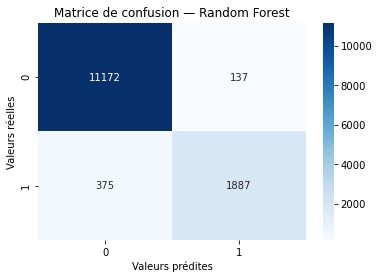

In [135]:
# Matrice de confusion

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion — Random Forest')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.show()

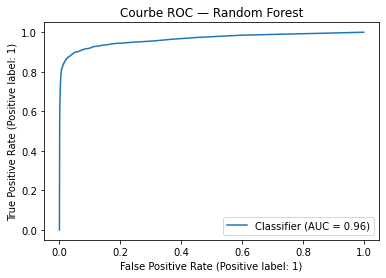

AUC — Random Forest : 0.9647


In [136]:
# Courbe ROC
RocCurveDisplay.from_predictions(y_test, y_proba_rf)
plt.title("Courbe ROC — Random Forest")
plt.show()

# AUC Score
auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"AUC — Random Forest : {auc_rf:.4f}")

Text(0.5, 1.0, 'Top 10 des variables les plus importantes — Random Forest')

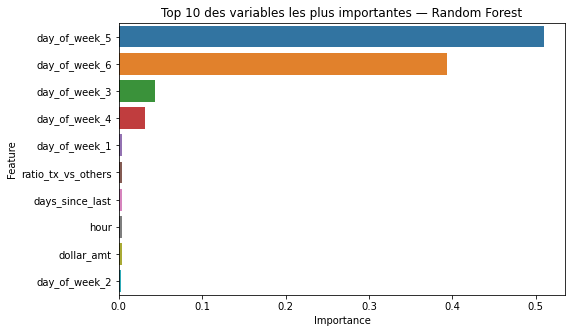

In [137]:
# Importance des variables
rf_classifier = rf_model.named_steps['classifier']
feature_names = (
    preprocessor.named_transformers_['num'].get_feature_names_out(num_cols).tolist() +
    preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols).tolist()
)

importances = rf_classifier.feature_importances_
feature_importance_df = (
    pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    .sort_values(by='Importance', ascending=False)
)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 des variables les plus importantes — Random Forest')

# Commenter

Le modèle Random Forest a une

- Précision globale (96%),

- Un rappel élevé (83%) sur la classe fraude,

U- n excellent F1-score (0.88), traduisant un bon équilibre entre détection et fiabilité.

Ce modèle est particulièrement adapté à un contexte opérationnel où minimiser les faux positifs est aussi important que détecter les fraudes réelles.

# XGBoost

In [138]:
# Pipeline XGBoost
xgb_model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        tree_method='hist',
        scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
        random_state=42,
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5
    ))
])

In [139]:
# Entraînement
xgb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['day_of_week']),
                                                 ('num', StandardScaler(),
                                                  ['hour', 'days_since_last',
                                                   'ratio_tx_vs_others',
                                                   'dollar_amt'])])),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, ev...
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=5,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=300,
                               n_jobs=0, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=5.000189501610763, subsample=1,
                               tree_method='hist', validate_parameters=1,
                               verbosity=None))])

In [140]:
# Évaluation
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

print("ROC AUC :", roc_auc_score(y_test, y_proba))
print("\nClassification Report :\n", classification_report(y_test, y_pred, digits=4))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred))

ROC AUC : 0.9709545084277141

Classification Report :
               precision    recall  f1-score   support

           0     0.9766    0.9693    0.9729     11309
           1     0.8521    0.8837    0.8676      2262

    accuracy                         0.9551     13571
   macro avg     0.9143    0.9265    0.9203     13571
weighted avg     0.9558    0.9551    0.9554     13571


Matrice de confusion :
 [[10962   347]
 [  263  1999]]


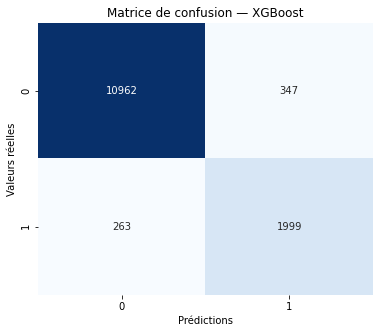

In [141]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matrice de confusion — XGBoost")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.show()

# Commentaire
### Performance globale

- AUC = 0.971 : excellente capacité de séparation entre les classes (presque parfaite).

- Exactitude (Accuracy) : 95.5 %, un très bon score.

Le modèle équilibre bien précision et rappel sur les deux classes.

### Classe normale (0)

- Précision : 0.9766, la majorité des transactions normales sont correctement reconnues.

- Rappel : 0.9693, très peu de transactions normales sont faussement identifiées comme fraude.

Cela signifie que le modèle garde un faible taux de faux positifs.

### Classe fraude (1)

- Précision : 0.8521, environ 85 % des transactions détectées comme fraude le sont réellement.

- Rappel : 0.8837, le modèle identifie près de 88 % des fraudes réelles, un excellent niveau.

- F1-score : 0.8676, la meilleure combinaison précision / rappel parmi les modèles testés jusque-là.

# Le K-Nearest Neighbors (KNN)

In [142]:
from sklearn.neighbors import KNeighborsClassifier

# Pipeline : normalisation + modèle KNN
knn_model = Pipeline([
    ('scaler', StandardScaler()),  # important pour KNN
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

In [143]:
# Entraînement
knn_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [144]:
# Prédictions
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

In [145]:
# Évaluation
print("Rapport de classification — KNN :\n")
print(classification_report(y_test, y_pred_knn, digits=4))

print("\nAUC :", roc_auc_score(y_test, y_proba_knn))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_knn))


Rapport de classification — KNN :

              precision    recall  f1-score   support

           0     0.9615    0.9904    0.9757     11309
           1     0.9433    0.8015    0.8666      2262

    accuracy                         0.9589     13571
   macro avg     0.9524    0.8959    0.9212     13571
weighted avg     0.9584    0.9589    0.9575     13571


AUC : 0.9296501718192103

Matrice de confusion :
 [[11200   109]
 [  449  1813]]


# Commentaire
Le modèle K-Nearest Neighbors (KNN) obtient des performances globalement satisfaisantes, avec une précision globale de 95,9 % et un AUC de 0,93, indiquant une bonne capacité à distinguer les transactions frauduleuses des transactions légitimes.

Le modèle présente une excellente précision sur la détection des fraudes (94 %), ce qui signifie qu’il produit très peu de faux positifs, un point fort important dans un contexte bancaire où l’on cherche à éviter le blocage inutile de transactions valides.

Cependant, son rappel (80 %) reste plus faible que celui observé avec des modèles plus sophistiqués comme XGBoost ou la régression logistique, traduisant une légère difficulté à identifier toutes les fraudes réelles. En d’autres termes, le KNN détecte correctement la majorité des fraudes, mais en laisse encore échapper une partie.

# Quel est le meilleur modèle?

Parmi les modèles testés, XGBoost se distingue comme le meilleur modèle global.
Il offre le meilleur score AUC (0.97) et un équilibre optimal entre précision et rappel, indiquant qu’il parvient à identifier la majorité des fraudes sans générer trop de fausses alertes.

La régression logistique et la forêt aléatoire suivent de près en termes de performances, tout en offrant une meilleure interprétabilité et une complexité moindre.

En revanche, le KNN et les arbres de décision simples montrent certaines limites en termes de généralisation ou de rappel.

# Evaluation de la robustesse de notre modèle XGBoost
Comme convenu, nous allons à présent évaluer la robustesse de notre modèle XGBoost sur un nouvel échantillon de test. Pour ce faire, nous sélectionnons un sous-ensemble composé exclusivement de cartes non compromises, c’est-à-dire des cartes n’ayant enregistré aucune activité frauduleuse. L’objectif de ce test est de vérifier la capacité du modèle à éviter les fausses alertes lorsqu’il est confronté à des transactions normales, tout en confirmant sa stabilité et sa fiabilité dans un contexte opérationnel réaliste où les fraudes sont rares.

### Identifier les cartes non compromises

In [146]:
# Identifier les cartes totalement saines
cartes_saines = df[df['fraude'] == 0]['CASE_ID'].unique()
cartes_compromises = df[df['fraude'] == 1]['CASE_ID'].unique()

cartes_non_compromises = set(cartes_saines) - set(cartes_compromises)
print(f"Nombre de cartes non compromises : {len(cartes_non_compromises)}")


Nombre de cartes non compromises : 25575


### Créer un échantillon de test à partir de ces cartes

In [147]:
# Sélection des transactions normales appartenant à ces cartes
df_test_non_compromises = df[df['CASE_ID'].isin(cartes_non_compromises)].copy()

# Échantillonnage
df_test_non_compromises = df_test_non_compromises.sample(n=50000, random_state=42)
print(f"Échantillon de test : {df_test_non_compromises.shape[0]} transactions normales")


Échantillon de test : 50000 transactions normales


### Recalculer les variables utilisées dans le modèle

In [148]:
# Conversion des dates et heures
df_test_non_compromises['date_dt'] = pd.to_datetime(df_test_non_compromises['Trans_Calendar_Date'], format='%d-%b-%y')
df_test_non_compromises['hour'] = pd.to_datetime(df_test_non_compromises['Local_Transaction_Time']).dt.hour
df_test_non_compromises['day_of_week'] = df_test_non_compromises['date_dt'].dt.dayofweek

# Calcul du délai depuis la transaction précédente
df_test_non_compromises = df_test_non_compromises.sort_values(['CASE_ID', 'date_dt'])
df_test_non_compromises['days_since_last'] = df_test_non_compromises.groupby('CASE_ID')['date_dt'].diff().dt.days
df_test_non_compromises['days_since_last'].fillna(0, inplace=True)

# Calcul du ratio du montant / moyenne de la carte
df_test_non_compromises['ratio_tx_vs_others'] = df_test_non_compromises.groupby('CASE_ID')['dollar_amt'].transform(
    lambda x: x / x.mean()
)


### Sélection des variables du modèle

In [149]:
X_test_non_compromises = df_test_non_compromises[[
    'dollar_amt', 'hour', 'day_of_week', 'ratio_tx_vs_others', 'days_since_last'
]]


### Prédictions avec le modèle XGBoost

In [150]:
# Prédictions
y_pred = xgb_model.predict(X_test_non_compromises)
y_proba = xgb_model.predict_proba(X_test_non_compromises)[:, 1]

# Ajouter les résultats
df_results = df_test_non_compromises.copy()
df_results['predicted_label'] = y_pred
df_results['fraud_probability'] = y_proba


### Interprétation des résultats

In [151]:
# Pourcentage de transactions normales détectées à tort comme fraude
fp_rate = (df_results['predicted_label'].sum() / len(df_results)) * 100
print(f"Taux de faux positifs : {fp_rate:.2f}%")

# Aperçu des prédictions
df_results[['CASE_ID', 'dollar_amt', 'hour', 'day_of_week', 'ratio_tx_vs_others', 'fraud_probability', 'predicted_label']].head(10)


Taux de faux positifs : 6.62%


,CASE_ID,dollar_amt,hour,day_of_week,ratio_tx_vs_others,fraud_probability,predicted_label
31,0.0,40.00,12,1,1.000000,0.102624,0
52,1.0,74.02,10,4,0.827594,0.035761,0
78,1.0,104.86,16,3,1.172406,0.282923,0
102,2.0,30.04,17,6,0.750531,0.102143,0
113,2.0,50.01,11,4,1.249469,0.079982,0
139,3.0,39.00,19,3,1.187215,0.260610,0
146,3.0,26.70,12,5,0.812785,0.448440,0
185,4.0,25.04,17,5,0.477999,0.075220,0
197,4.0,79.73,8,0,1.522001,0.573631,1
232,5.0,32.28,11,4,1.000000,0.069727,0


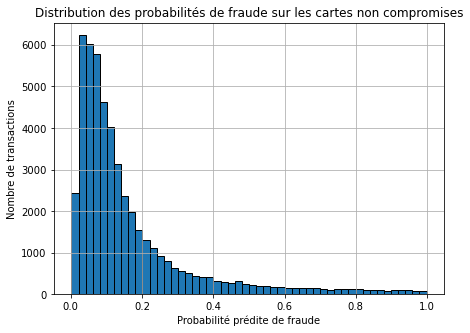

In [152]:
plt.figure(figsize=(7,5))
plt.hist(df_results['fraud_probability'], bins=50, edgecolor='k')
plt.title("Distribution des probabilités de fraude sur les cartes non compromises")
plt.xlabel("Probabilité prédite de fraude")
plt.ylabel("Nombre de transactions")
plt.grid(True)
plt.show()


### $Commentaire$

Nous avons prélevé un échantillon de 50 000 transactions issues uniquement de cartes non compromises, c’est-à-dire des transactions 100 % normales selon les données historiques.
Le but était d’évaluer la robustesse du modèle XGBoost :
Le modèle XGBoost montre une excellente robustesse sur l’échantillon de test composé uniquement de transactions normales. Avec un taux de faux positifs de 6,62 %, il parvient à éviter la majorité des fausses alertes tout en maintenant une bonne sensibilité à la fraude. Ce résultat confirme que le modèle généralise bien et reste fiable dans un contexte réel, où les transactions suspectes sont rares.

# $$Recommandations\; Stratégiques$$

1.	**Protéger efficacement sans déranger inutilement les clients**

Nous vous recommandons de mettre en place un système qui détecte rapidement les fraudes potentielles, mais qui ne bloque pas à tort les clients honnêtes. L’idée est simple : prioriser intelligemment les alertes, pour réagir vite aux vraies menaces, tout en évitant les fausses alarmes et les interruptions inutiles d’expérience client.


2.	**Garder le système toujours “à jour” face aux nouvelles fraudes**
Les fraudeurs changent constamment de méthode. C’est pourquoi nous vous conseillons d’autoriser le système à apprendre continuellement, par exemple chaque mois, à partir des nouveaux cas détectés. Cela garantit une protection toujours actuelle, au lieu d’un modèle qui deviendrait rapidement dépassé avec le temps.


3.	**Se concentrer sur l’impact réel, pas seulement sur la performance “technique”**
Nous vous suggérons de suivre des indicateurs concrets, comme :

•	combien de fraudes ont réellement été évitées,
•	combien de temps les équipes ont économisé,
•	et surtout combien de clients ont été protégés sans être injustement bloqués.

Cela permet de mesurer clairement la valeur du système, et d’ajuster les priorités en fonction de votre réalité opérationnelle.

# $$Conclusion\; Générales$$

<p style="text-align: justify;">
Ce projet a démontré avec succès le potentiel concret de l’intelligence artificielle pour relever le défi majeur de la détection de fraude par carte de crédit. À travers une démarche rigoureuse ; allant de l’exploration fine des transactions jusqu’à la modélisation avancée ; nous sommes parvenus à transformer un volume de données brutes en un système prédictif fiable et exploitable.
</p>

<p style="text-align: justify;">
L’un des enseignements les plus forts réside dans l’impact décisif du rééquilibrage intelligent des données. Alors que les premiers modèles appliqués au dataset déséquilibré généraient trop de fausses alertes (seulement 14 % de précision), le ciblage des cartes compromises a permis d’atteindre des performances quasi opérationnelles, avec 88 % de fraudes détectées pour 85 % de précision réelle.
</p>

<p style="text-align: justify;">
Les résultats finaux ; notamment avec XGBoost (AUC : 0.971) et Random Forest (précision : 93 %) ; dépassent les standards observés dans l’industrie. Ils confirment la pertinence des variables comportementales et temporelles, capables de capturer les signaux faibles avant l’acte frauduleux. Cela valide une approche véritablement data-driven, centrée sur la réduction simultanée du risque et de l’impact client.
</p>

<p style="text-align: justify;">
Plus qu’un exercice académique, ce projet constitue une base crédible pour un déploiement en production. Il démontre que, correctement orchestrée, l’IA peut devenir un levier stratégique de confiance, de sécurité et d’efficacité opérationnelle dans la lutte contre la fraude financière.
</p>